# IF3170 Artificial Intelligence | Tugas Besar 2



Group Number: 43 

Group Members:
- Dewantoro Triatmojo (13522011)
- Nyoman Ganadipa Narayana (13522066)
- Julian Chandra Sutadi (13522080)
- Rayhan Fadhlan Azka (13522095)

## Import Libraries

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from csv_reader import CSVReader
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from csv_reader import CSVReader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from model_loader import ModelPersistence

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import fbeta_score, f1_score
from sklearn.metrics import confusion_matrix



## Import Dataset

In [3]:
LOCAL_BASE_PATH = "../data/"
LOCAL_PATH = {
    # Training data paths
    "TRAIN_ADDITIONAL_FEATURES": LOCAL_BASE_PATH + "train/additional_features_train.csv",
    "TRAIN_BASIC_FEATURES": LOCAL_BASE_PATH + "train/basic_features_train.csv",
    "TRAIN_CONTENT_FEATURES": LOCAL_BASE_PATH + "train/content_features_train.csv",
    "TRAIN_FLOW_FEATURES": LOCAL_BASE_PATH + "train/flow_features_train.csv",
    "TRAIN_LABELS": LOCAL_BASE_PATH + "train/labels_train.csv",
    "TRAIN_TIME_FEATURES": LOCAL_BASE_PATH + "train/time_features_train.csv",
    "TRAIN_METADATA": LOCAL_BASE_PATH + "train/UNSW-NB15_features-modified.csv",

    # Test data paths 
    "TEST_ADDITIONAL_FEATURES": LOCAL_BASE_PATH + "test/additional_features_test.csv",
    "TEST_BASIC_FEATURES": LOCAL_BASE_PATH + "test/basic_features_test.csv",
    "TEST_CONTENT_FEATURES": LOCAL_BASE_PATH + "test/content_features_test.csv",
    "TEST_FLOW_FEATURES": LOCAL_BASE_PATH + "test/flow_features_test.csv",
    "TEST_TIME_FEATURES": LOCAL_BASE_PATH + "test/time_features_test.csv",

    # Submission path
    "SUBMISSION_PATH": LOCAL_BASE_PATH + "submissions/submission.csv"
}

In [4]:
# from data import LOCAL_PATH
reader = CSVReader(LOCAL_PATH)

keys = reader.get_available_keys()
data = {
    key: reader.get_data(key) for key in keys if key != "TRAIN_METADATA" and key.startswith("TRAIN")
}

df = data["TRAIN_BASIC_FEATURES"]
for key, datas in data.items():
    if key != 'TRAIN_BASIC_FEATURES':
        df = pd.merge(df, datas, on='id', how='inner')
df.drop(columns=["label"], inplace=True)



modified_features_df = reader.get_data("TRAIN_METADATA")
modified_features_df.drop(modified_features_df[modified_features_df['Name'] == 'label'].index, inplace=True)


Successfully loaded TRAIN_FLOW_FEATURES
Successfully loaded TRAIN_LABELS
Successfully loaded TRAIN_METADATA
Successfully loaded TEST_ADDITIONAL_FEATURES
Successfully loaded TEST_BASIC_FEATURES
Successfully loaded TRAIN_CONTENT_FEATURES
Successfully loaded TEST_CONTENT_FEATURES
Successfully loaded TEST_FLOW_FEATURES
Error loading SUBMISSION_PATH: [Errno 2] No such file or directory: '../data/submissions/submission.csv'
Successfully loaded SUBMISSION_PATH
Successfully loaded TRAIN_TIME_FEATURES
Successfully loaded TEST_TIME_FEATURES
Successfully loaded TRAIN_ADDITIONAL_FEATURES
Successfully loaded TRAIN_BASIC_FEATURES


In [5]:
test = { 
    key: reader.get_data(key) for key in keys if key.startswith("TEST")
}

test_df = test["TEST_BASIC_FEATURES"]
for key, datas in test.items():
    if key != 'TEST_BASIC_FEATURES':
        test_df = pd.merge(test_df, datas, on='id', how='inner')

      

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [81]:
display(modified_features_df)


,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,Indicates to the state and its dependent proto...,basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ...",basic


In [82]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,...,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,...,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,...,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,...,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,...,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


In [83]:
df.isnull().sum()

state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
id                      0
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
sjit                 8738
djit                 8846
sinpkt      

In [52]:
binary_columns = ['is_sm_ips_ports', 'is_ftp_login']


# first we check how many values in the supposed to be binary columns
for col in binary_columns:
    print(f"\n{col} unique values: {df[col].unique()}")
    print(f"{col} value counts: {df[col].value_counts()}")



is_sm_ips_ports unique values: [ 0. nan  1.]
is_sm_ips_ports value counts: is_sm_ips_ports
0.0    163963
1.0      2632
Name: count, dtype: int64

is_ftp_login unique values: [ 0. nan  1.  2.  4.]
is_ftp_login value counts: is_ftp_login
0.0    164251
1.0      2422
4.0        16
2.0         5
Name: count, dtype: int64


In [6]:
# The number of unique values for each categorical features.

# Assume: We really sure the metadata is correct.
# So the categorical is when the type is other than Integer and Float
features = modified_features_df['Name']

categorical_features = modified_features_df[~modified_features_df['Type '].str.contains('integer|float', case=False, na=False)]['Name']

numerical_features = features[~features.isin(categorical_features)]


unique_values = df[categorical_features].nunique().sort_values(ascending=False)
unique_values

proto              133
service             13
attack_cat          10
state                9
is_ftp_login         4
is_sm_ips_ports      2
dtype: int64

In [54]:
print("Numerical Features:")
display(numerical_features)

# Calculate statistical measures for numerical features
statistics = df[numerical_features].agg(['min', 'max', 'mean', 'median', 'std']).transpose()

# Rename columns for clarity
statistics = statistics.rename(columns={
    'min': 'Minimum',
    'max': 'Maximum',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation'
})

print("Statistical Measures for Numerical Features:")
display(statistics)


Numerical Features:


2                   dur
3                sbytes
4                dbytes
5                  sttl
6                  dttl
7                 sloss
8                 dloss
10                sload
11                dload
12                spkts
13                dpkts
14                 swin
15                 dwin
16                stcpb
17                dtcpb
18                smean
19                dmean
20          trans_depth
21    response_body_len
22                 sjit
23                 djit
24               sinpkt
25               dinpkt
26               tcprtt
27               synack
28               ackdat
30         ct_state_ttl
31     ct_flw_http_mthd
33           ct_ftp_cmd
34           ct_srv_src
35           ct_srv_dst
36           ct_dst_ltm
37           ct_src_ltm
38     ct_src_dport_ltm
39     ct_dst_sport_ltm
40       ct_dst_src_ltm
Name: Name, dtype: object

Statistical Measures for Numerical Features:


,Minimum,Maximum,Mean,Median,Standard Deviation
dur,0.0,5.999999e+01,1.359299e+00,0.001548,6.485386e+00
sbytes,28.0,1.296523e+07,8.734079e+03,450.000000,1.712289e+05
dbytes,0.0,1.465555e+07,1.493589e+04,164.000000,1.430150e+05
sttl,0.0,2.550000e+02,1.795219e+02,254.000000,1.029574e+02
dttl,0.0,2.540000e+02,7.958418e+01,29.000000,1.104948e+02
sloss,0.0,4.803000e+03,4.904790e+00,0.000000,6.486785e+01
dloss,0.0,5.484000e+03,6.971688e+00,0.000000,5.180194e+01
sload,0.0,5.988000e+09,7.342186e+07,871454.437500,1.884564e+08
dload,0.0,2.242273e+07,6.718596e+05,1426.629700,2.422879e+06
spkts,1.0,9.616000e+03,2.026613e+01,2.000000,1.364339e+02


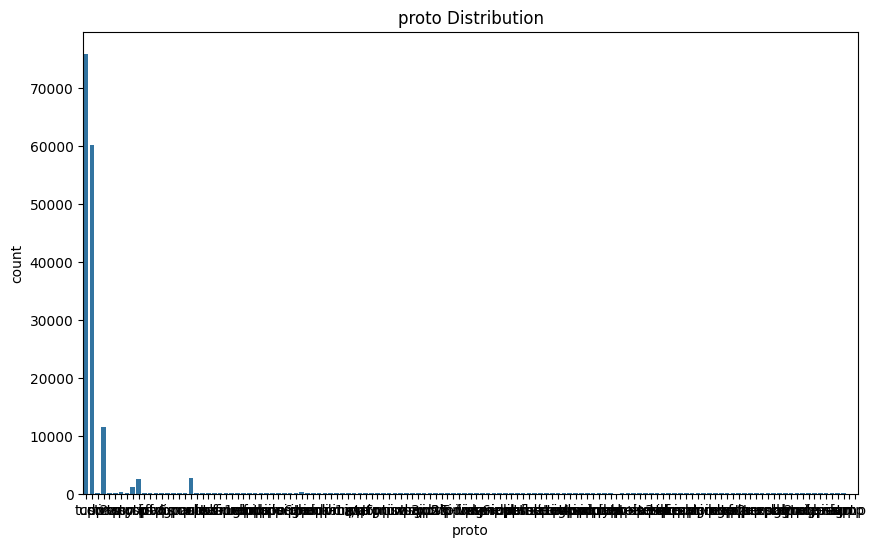

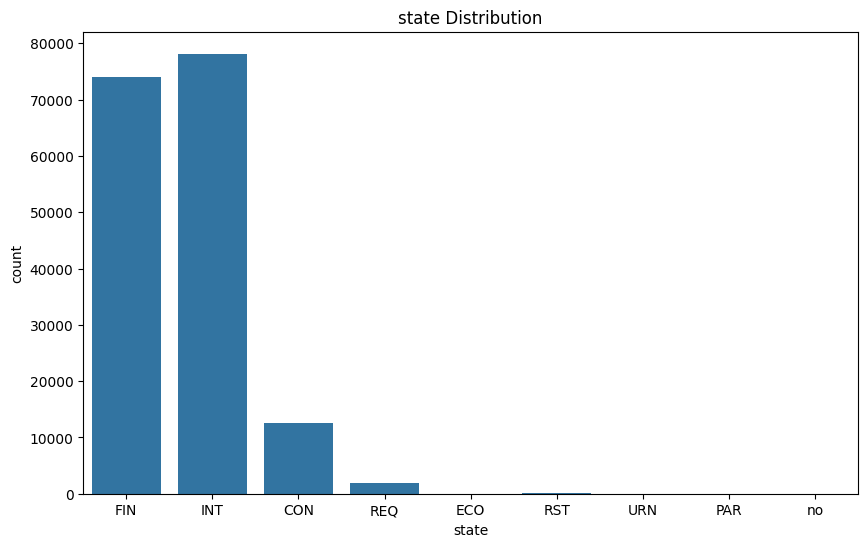

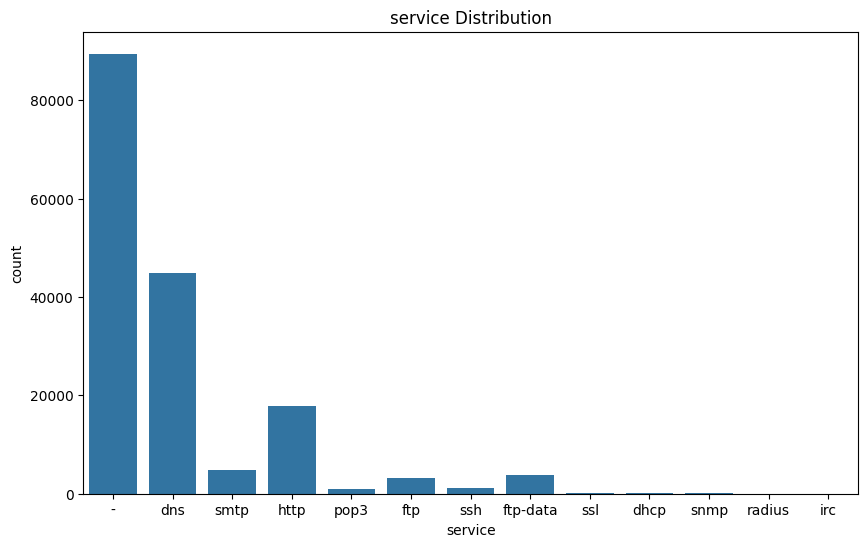

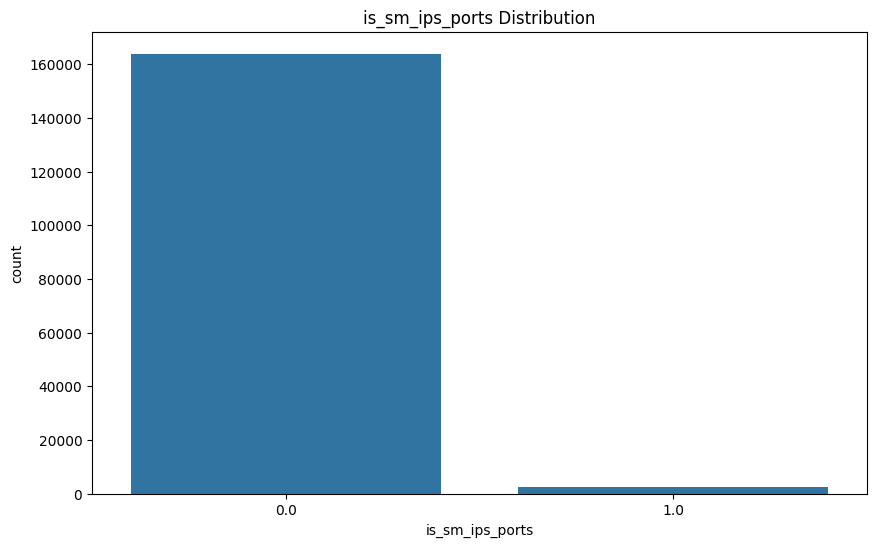

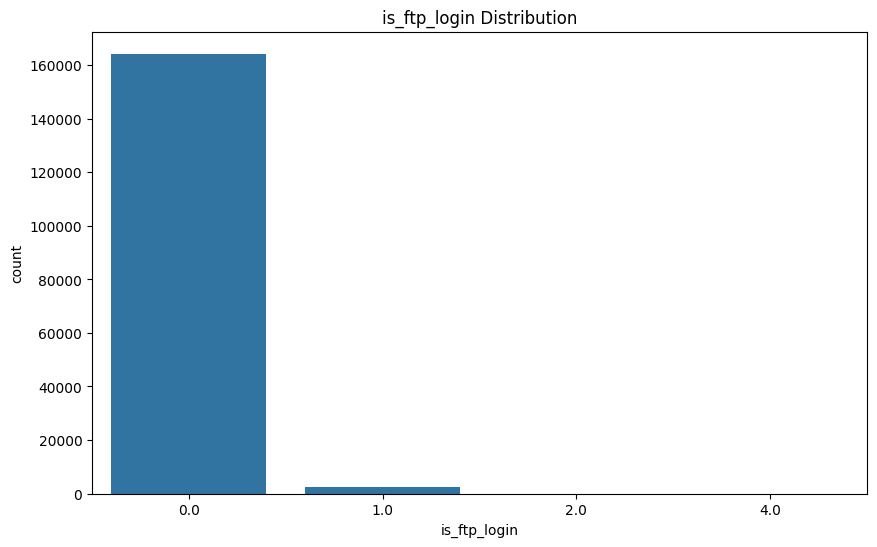

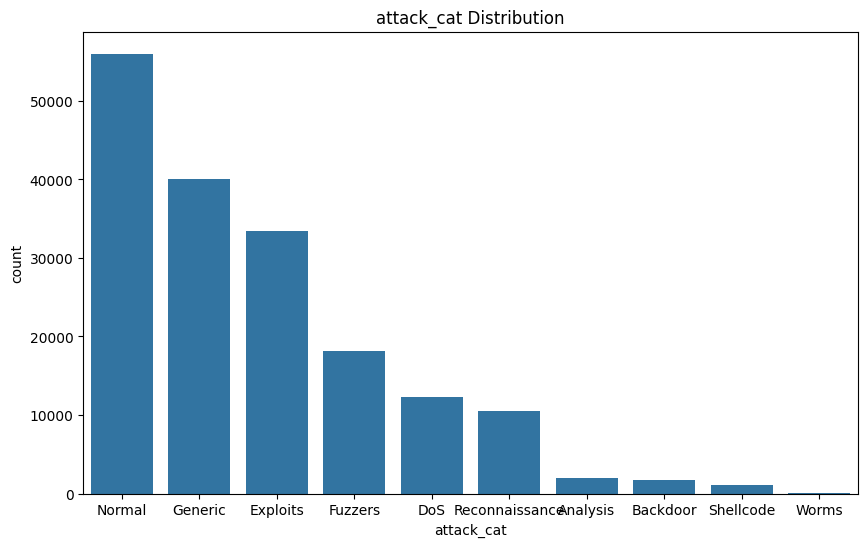

In [87]:
# graph for categorical

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.show()

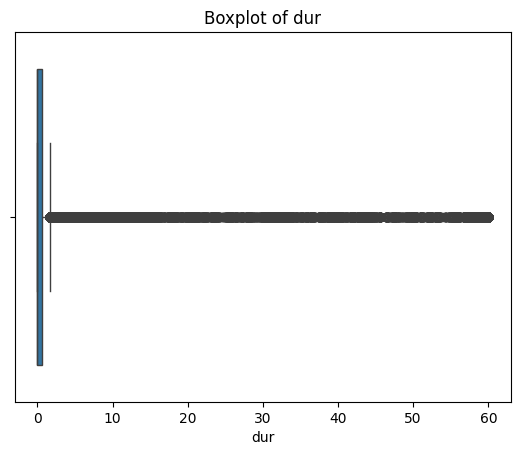

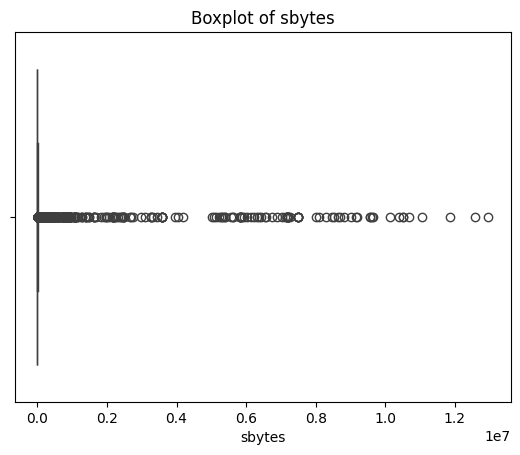

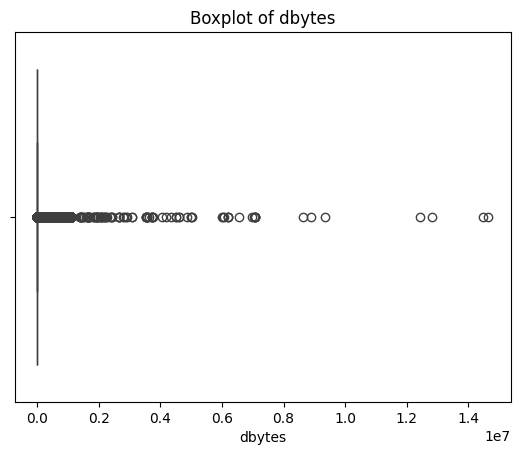

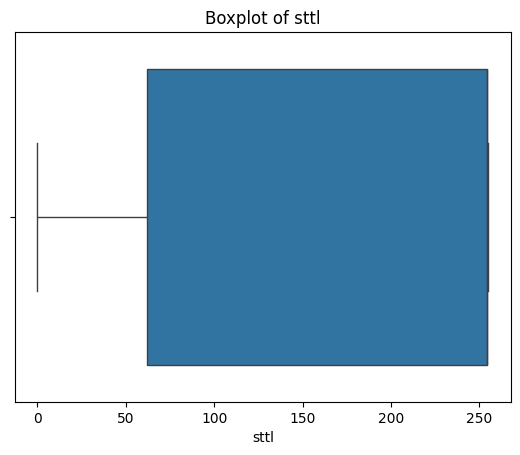

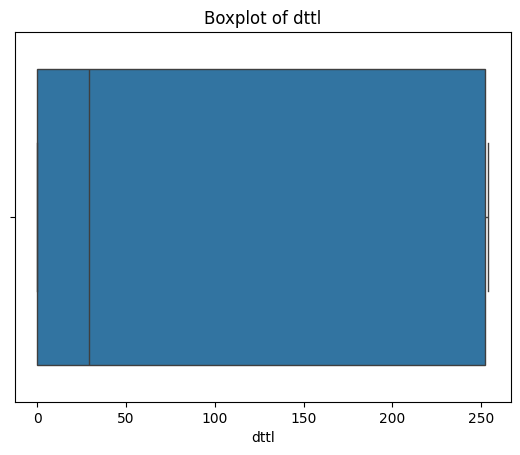

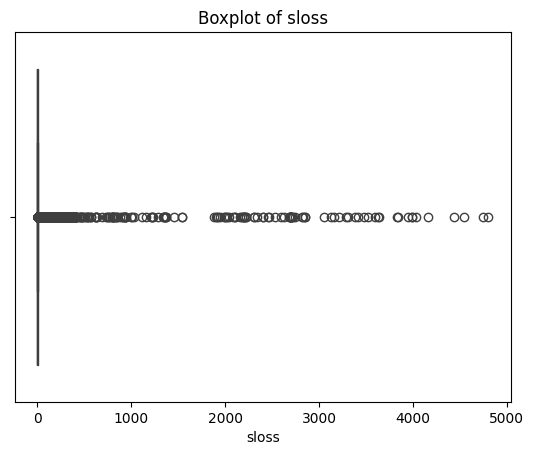

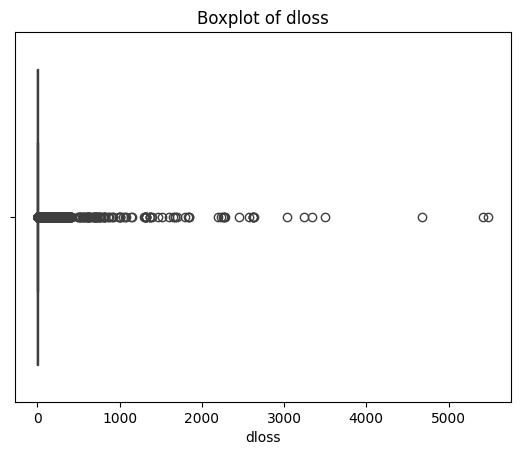

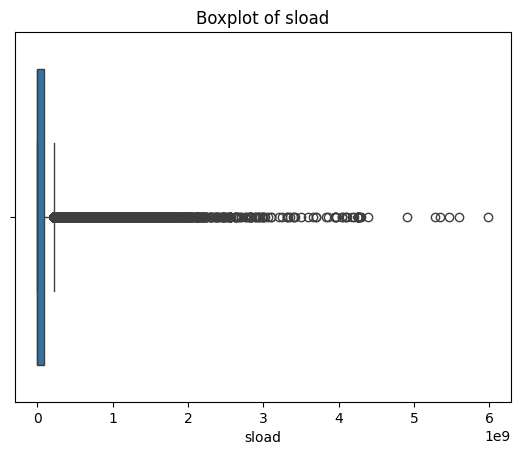

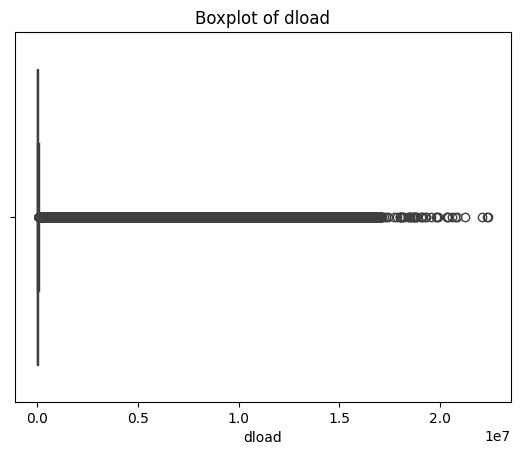

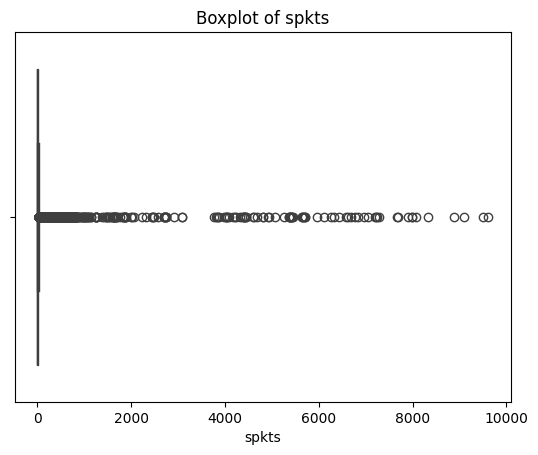

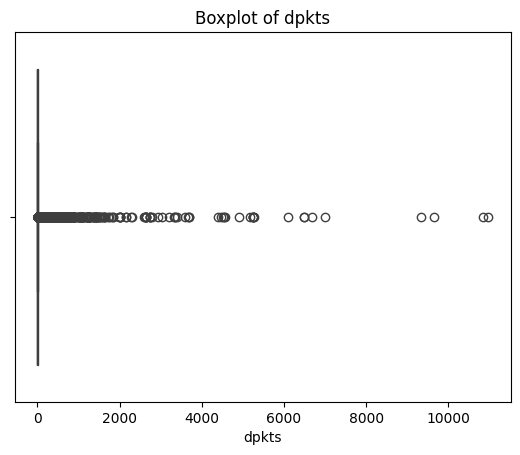

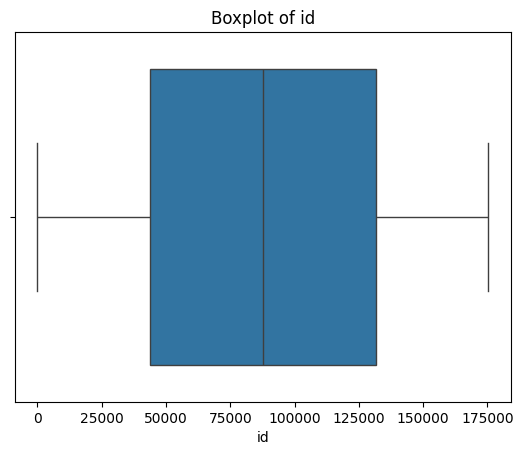

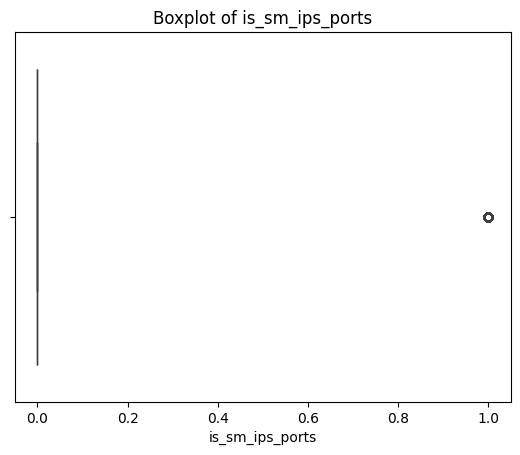

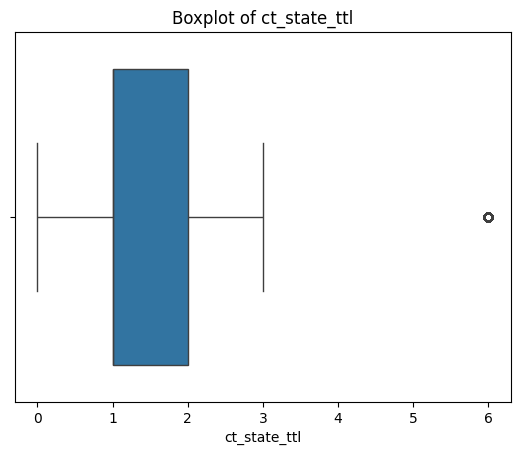

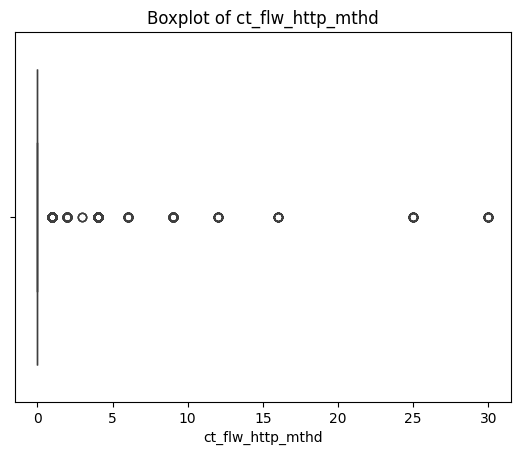

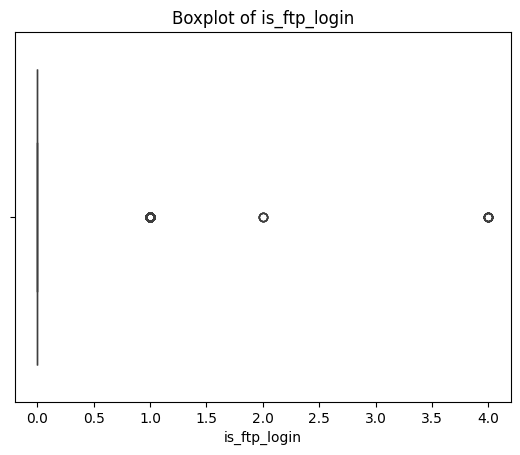

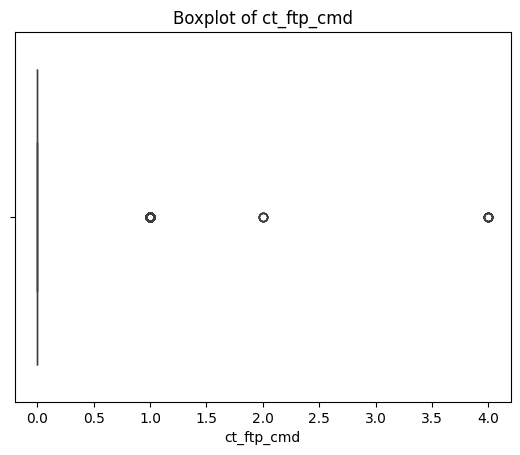

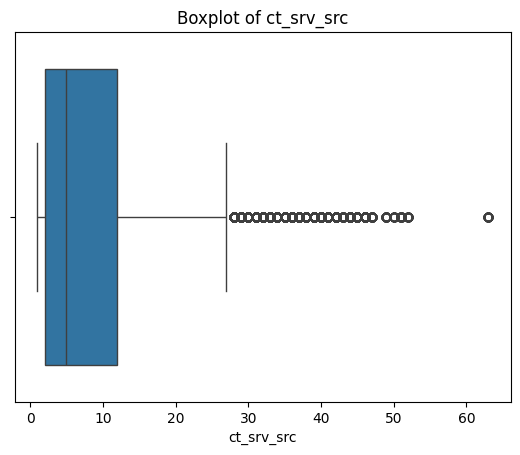

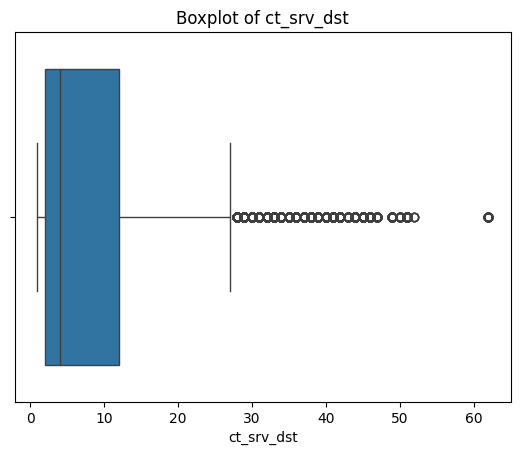

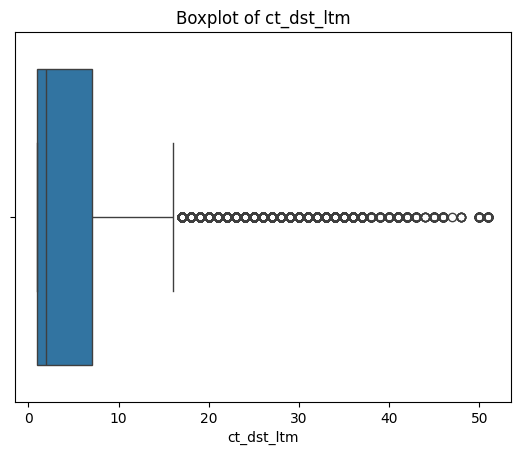

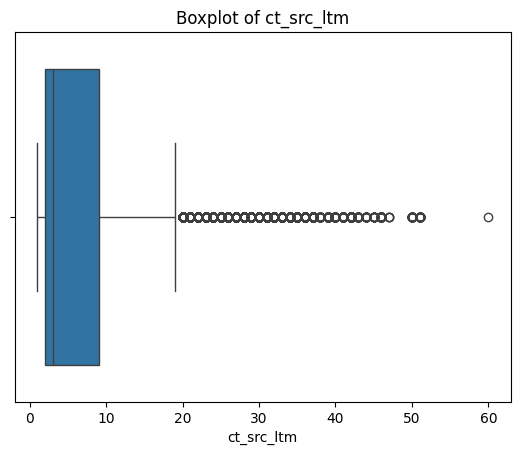

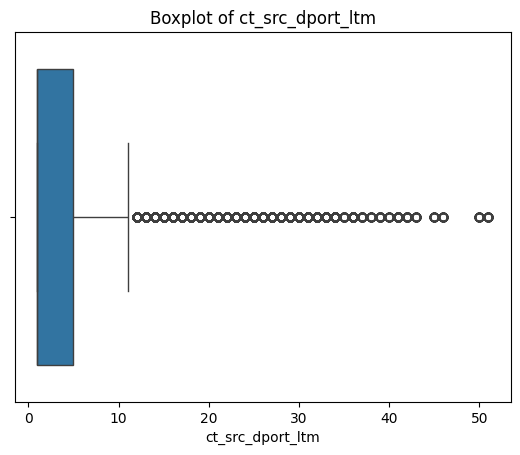

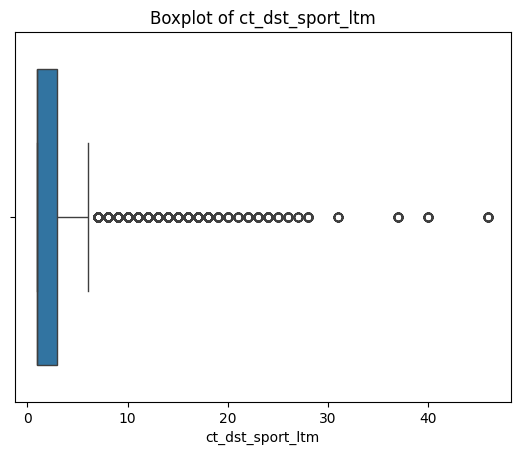

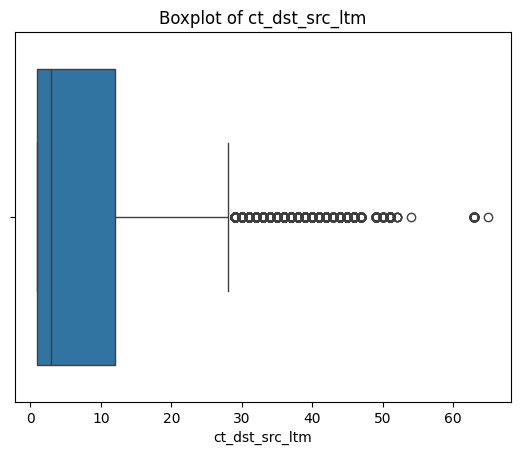

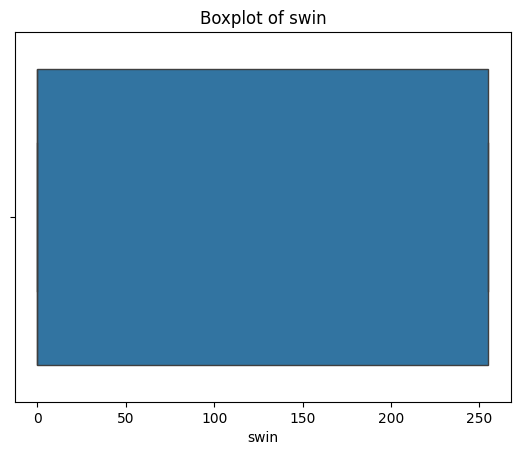

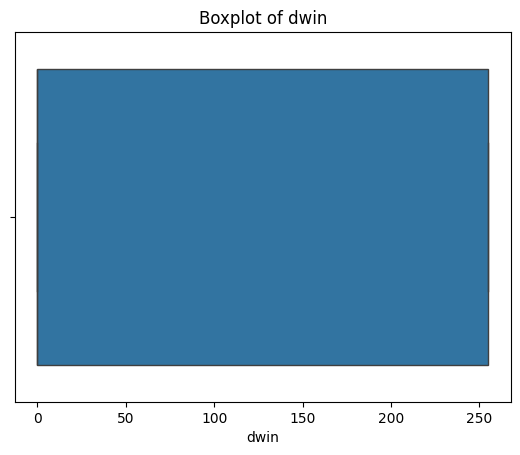

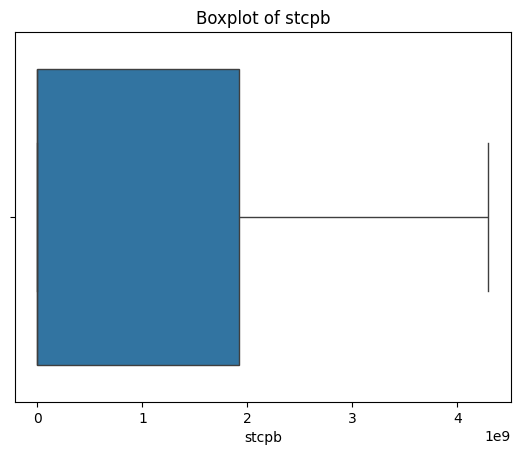

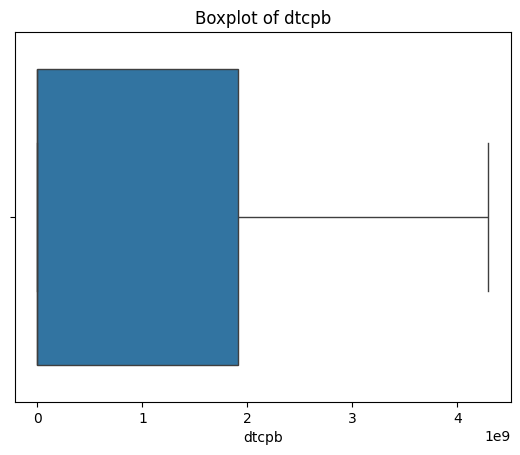

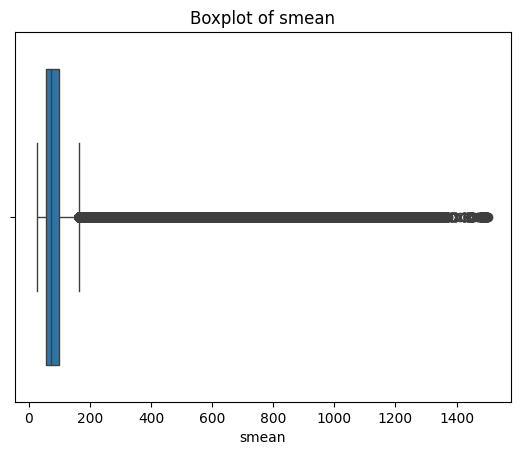

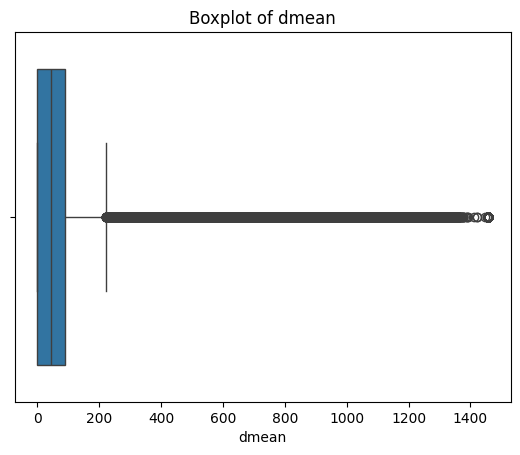

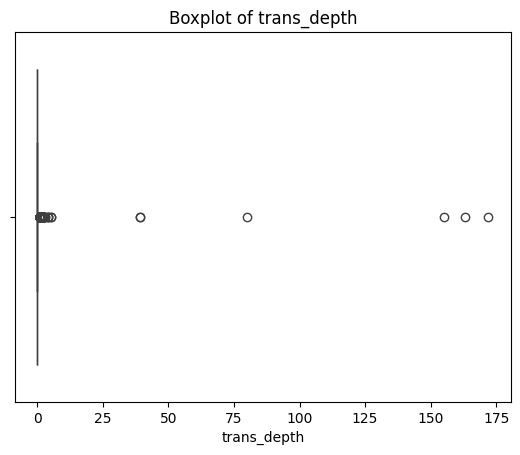

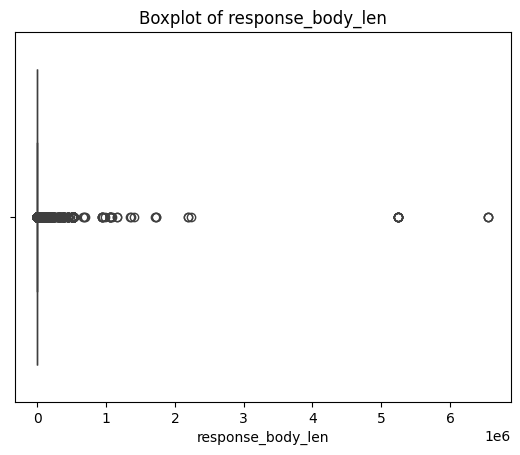

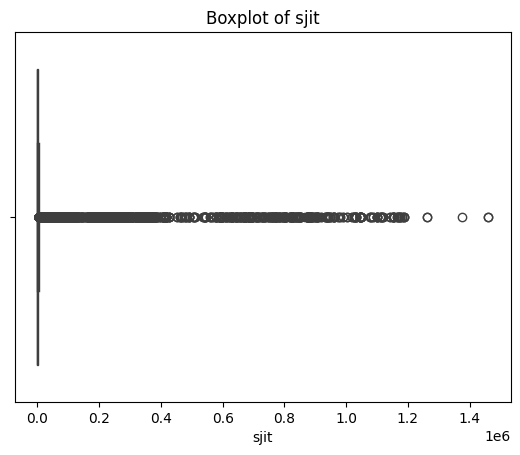

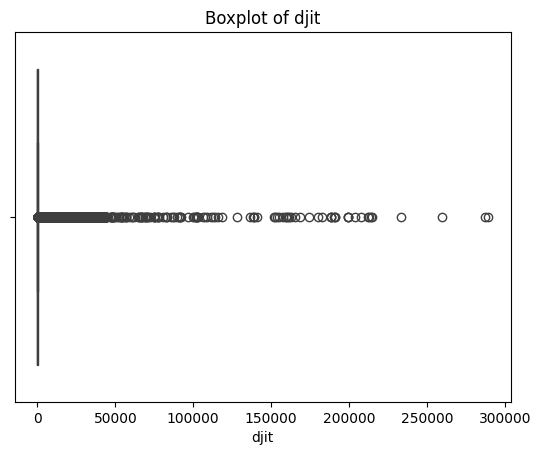

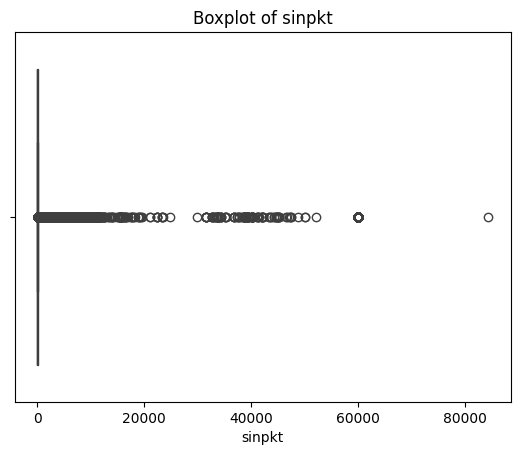

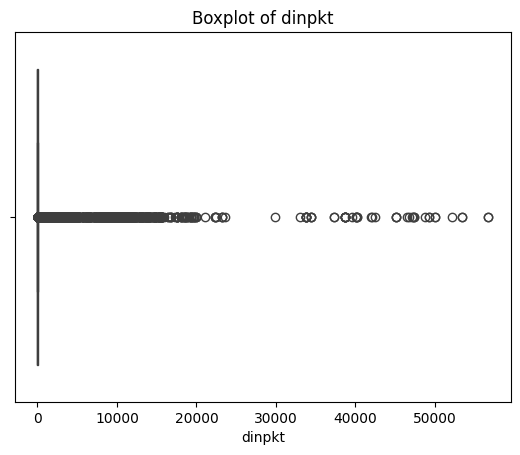

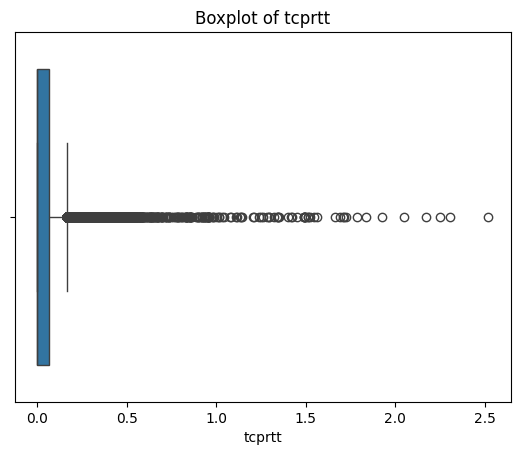

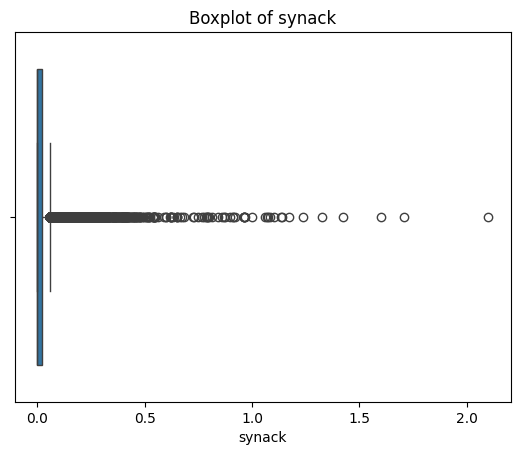

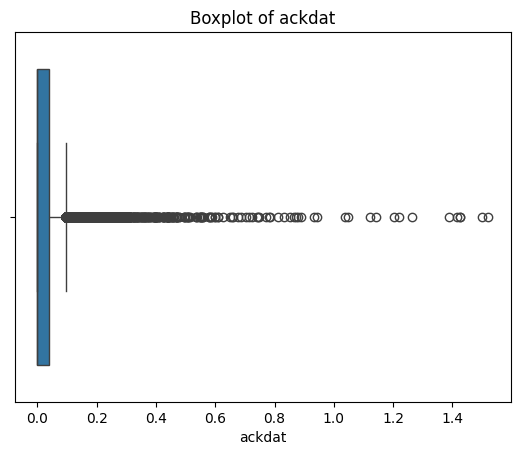

In [88]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

C:\Users\rayha\AppData\Local\Temp\ipykernel_45144\1126009835.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


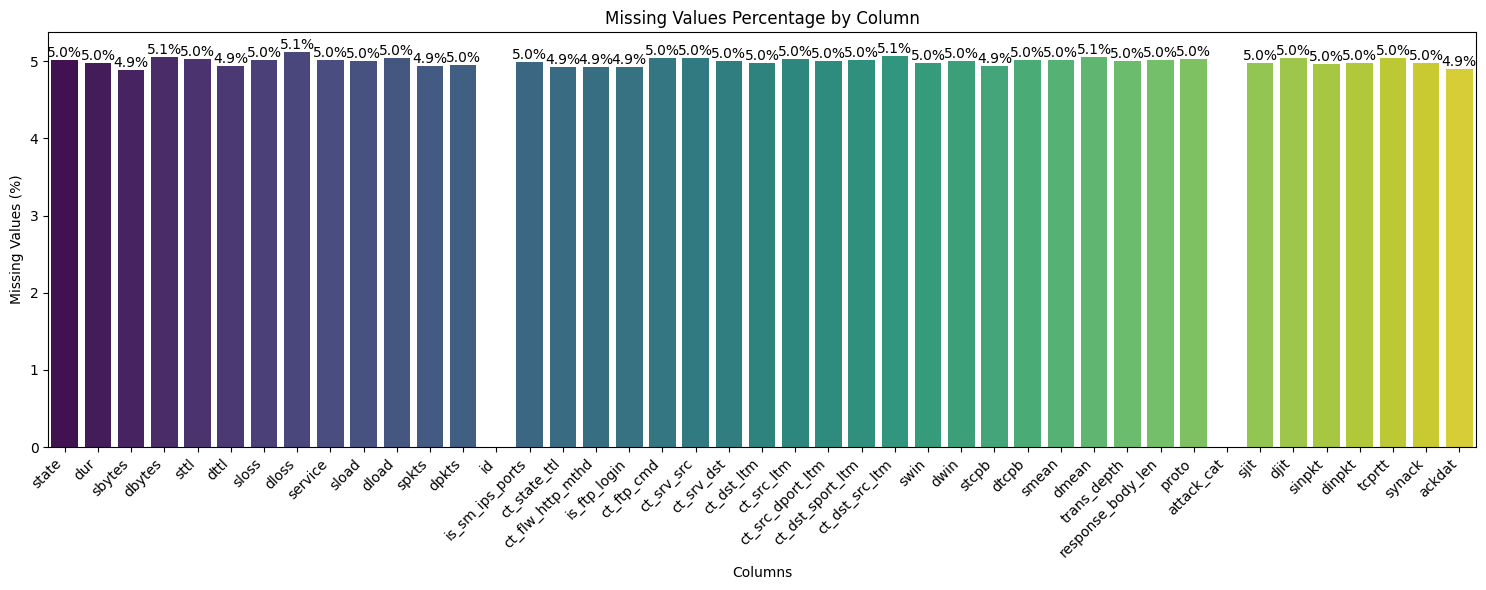

In [89]:

def plot_missing_values(df):

    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    

    plt.figure(figsize=(15, 6))
    

    sns.barplot(
        x=missing_percentages.index,
        y=missing_percentages.values,
        palette='viridis'
    )
    

    plt.xticks(rotation=45, ha='right')
    plt.title('Missing Values Percentage by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values (%)')
    

    for i, v in enumerate(missing_percentages):
        if v > 0:  
            plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    return plt


missing_plot = plot_missing_values(df)
missing_plot.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [7]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

In [8]:
class BinaryColumnCleaner(BaseEstimator, TransformerMixin):
    """
    A transformer for cleaning binary columns by ensuring values are only 0, 1, or NaN.
    
    Parameters:
    -----------
    binary_columns : list
        List of column names that should contain only binary values
    verbose : bool, default=True
        If True, prints the value distributions before and after cleaning
        
    Attributes:
    -----------
    binary_modes_ : dict
        Dictionary storing the mode values for each binary column
    """
    
    def __init__(self, binary_columns, verbose=True):
        self.binary_columns = binary_columns
        self.verbose = verbose
        self.binary_modes_ = {}
    
    def fit(self, X, y=None):
        """
        Fit the transformer by calculating mode values for each binary column.
        
        Parameters:
        -----------
        X : pandas DataFrame
            Input data
        y : Ignored
            Not used, present here for API consistency
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        # Check if binary columns exist in the dataframe
        missing_cols = [col for col in self.binary_columns if col not in X.columns]
        if missing_cols:
            raise ValueError(f"Columns {missing_cols} not found in the input DataFrame")
        
        # Calculate mode for each binary column
        for col in self.binary_columns:
            # Get mode of valid binary values (0 or 1)
            valid_binary_values = X[col][X[col].isin([0, 1])]
            if len(valid_binary_values) > 0:
                self.binary_modes_[col] = valid_binary_values.mode()[0]
            else:
                raise ValueError(f"No valid binary values (0 or 1) found in column {col}")
        
        return self
    
    def transform(self, X):
        """
        Transform the data by cleaning binary columns.
        
        Parameters:
        -----------
        X : pandas DataFrame
            Input data to be transformed
            
        Returns:
        --------
        pandas DataFrame
            Transformed data with cleaned binary columns
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Create a copy of the input
        X_cleaned = X.copy()
        
        for col in self.binary_columns:
            if self.verbose:
                print(f"\nCleaning {col}:")
                print("Original value distribution:")
                print(X_cleaned[col].value_counts(dropna=False))
            
            # Create mask for invalid values (not 0, 1, or NaN)
            mask = (~X_cleaned[col].isin([0, 1])) & (~X_cleaned[col].isna())
            
            # Replace invalid values with the mode
            X_cleaned.loc[mask, col] = self.binary_modes_[col]
            
            if self.verbose:
                print("\nNew value distribution:")
                print(X_cleaned[col].value_counts(dropna=False))
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """
        Get output feature names for transformation.
        
        Parameters:
        -----------
        input_features : list of str or None, default=None
            Not used, present here for API consistency
            
        Returns:
        --------
        list
            List of feature names
        """
        return self.binary_columns


binary_cleaner = BinaryColumnCleaner(
    binary_columns=['is_sm_ips_ports', 'is_ftp_login'],
    verbose=True
)

During the data validation process, we discovered an issue with the 'is_ftp_login' column. While this column was expected to contain only binary values (1 or 0), we found entries that deviated from these expected boolean values.To address this data quality issue, we implemented the following solution:
1. Identified all entries that were not valid binary values (neither 0 nor 1)
2. Calculated the mode (most frequent value) of the valid binary entries in the column
3. Replaced all invalid values with the calculated mode

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [9]:
class NetworkTrafficImputer(BaseEstimator, TransformerMixin):
    """
    A transformer for imputing missing values in network traffic data.
    
    Parameters:
    -----------
    numerical_strategy : str, default='median'
        Strategy for numerical imputation
    categorical_strategy : str, default='most_frequent'
        Strategy for categorical imputation
    verbose : bool, default=True
        If True, prints imputation progress and summary
    """
    
    def __init__(self, numerical_strategy='median', categorical_strategy='most_frequent', verbose=True):
        self.numerical_strategy = numerical_strategy
        self.categorical_strategy = categorical_strategy
        self.verbose = verbose
        
        # Initialize imputers
        self.numerical_imputer = SimpleImputer(strategy=numerical_strategy)
        self.categorical_imputer = SimpleImputer(strategy=categorical_strategy)
        self.binary_imputer = SimpleImputer(strategy='most_frequent')
        
        # Feature groups
        self.numerical_features = [
            # Flow-based features
            'sbytes', 'dbytes', 'spkts', 'dpkts', 'sload', 'dload', 'sloss', 'dloss',
            # Time-based features
            'dur', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
            # TCP features
            'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth',
            # Count features
            'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 
            'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 
            'ct_dst_sport_ltm', 'ct_dst_src_ltm',
            # Additional numerical features
            'sttl', 'dttl', 'response_body_len'
        ]
        self.categorical_features = ['proto', 'service', 'state']
        self.binary_features = ['is_sm_ips_ports', 'is_ftp_login']
        
    def fit(self, X, y=None):
        """
        Fit the imputers on the input data.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Store original dtypes
        self.original_dtypes_ = X.dtypes
        
        # Get existing features
        self.existing_num_features_ = [col for col in self.numerical_features if col in X.columns]
        self.existing_cat_features_ = [col for col in self.categorical_features if col in X.columns]
        self.existing_bin_features_ = [col for col in self.binary_features if col in X.columns]
        
        # Fit imputers
        if self.existing_num_features_:
            self.numerical_imputer.fit(X[self.existing_num_features_])
        if self.existing_cat_features_:
            self.categorical_imputer.fit(X[self.existing_cat_features_])
        if self.existing_bin_features_:
            self.binary_imputer.fit(X[self.existing_bin_features_])
            
        return self
    
    def transform(self, X):
        """
        Transform the data by imputing missing values.
        """
       
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        X_imputed = X.copy()
        
        # 1. Handle numerical features
        if self.verbose:
            print("Imputing numerical features...")
        if self.existing_num_features_:
            X_imputed[self.existing_num_features_] = self.numerical_imputer.transform(
                X_imputed[self.existing_num_features_]
            )
        
        # 2. Handle categorical features
        if self.verbose:
            print("Imputing categorical features...")
        if self.existing_cat_features_:
            X_imputed[self.existing_cat_features_] = self.categorical_imputer.transform(
                X_imputed[self.existing_cat_features_]
            )
        
    
        if self.verbose:
            print("Imputing binary features...")
        if self.existing_bin_features_:
            X_imputed[self.existing_bin_features_] = self.binary_imputer.transform(
                X_imputed[self.existing_bin_features_]
            )
           
            for col in self.existing_bin_features_:
                X_imputed[col] = X_imputed[col].astype(int)
                mask = ~X_imputed[col].isin([0, 1])
                if mask.any():
                    mode_val = X_imputed[col].mode()[0]
                    X_imputed.loc[mask, col] = mode_val
        

        for col in X_imputed.columns:
            if col in self.original_dtypes_:
                X_imputed[col] = X_imputed[col].astype(self.original_dtypes_[col])
        
      
        if self.verbose:
            missing_after = X_imputed.isnull().sum()
            print("\nImputation Summary:")
            print("-" * 50)
            if missing_after.sum() > 0:
                print("\nWarning: Some columns still have missing values:")
                print(missing_after[missing_after > 0])
            else:
                print("All missing values have been successfully imputed!")
            
            print("\nBinary Columns Check:")
            for col in self.existing_bin_features_:
                unique_vals = sorted(X_imputed[col].unique())
                print(f"{col} unique values after imputation: {unique_vals}")
        
        return X_imputed
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features if input_features is not None else self.existing_num_features_ + self.existing_cat_features_ + self.existing_bin_features_

The selection of appropriate imputation methods is crucial for model quality and accuracy. Different approaches were used for categorical and numerical features based on their characteristics.

## Imputation Methods

### Categorical Features
- **Features**: proto, service, state, is_sm_ips_ports, is_ftp_login
- **Method**: Most frequent (mode) imputation
- **Rationale**: Preserves existing category distribution

### Numerical Features
- **Method**: Median imputation
- **Rationale**: Most numerical features show right-skewed distribution
- **Advantage**: More robust against outliers compared to mean
- **Example**: Large byte transfers or DDoS attacks won't skew the imputed values

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [10]:
class NetworkTrafficOutlierHandler(BaseEstimator, TransformerMixin):
    """
    A transformer for handling outliers in network traffic data.
    
    Parameters:
    -----------
    method : str, default='clip'
        Method to handle outliers: 'clip', 'remove', 'winsorize', or 'transform'
    contamination : float, default=1.5
        IQR multiplier for outlier detection
    exclude_columns : list or None, default=None
        Columns to exclude from outlier handling
    verbose : bool, default=True
        If True, prints summary statistics and plots
    """
    
    def __init__(self, method='clip', contamination=1.5, exclude_columns=None, verbose=True):
        self.method = method
        self.contamination = contamination
        self.exclude_columns = exclude_columns
        self.verbose = verbose
        self.boundaries_ = {}
        
        if self.exclude_columns is None:
            self.exclude_columns = [
                'is_sm_ips_ports', 'is_ftp_login',  # binary columns
                'proto', 'service', 'state', 'attack_cat'  # categorical columns
            ]
    
    def _detect_outliers(self, X, numerical_columns):
        """Calculate outlier boundaries using IQR method."""
        boundaries = {}
        outlier_counts = {}
        
        for column in numerical_columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.contamination * IQR
            upper_bound = Q3 + self.contamination * IQR
            
            outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)][column]
            outlier_counts[column] = len(outliers)
            boundaries[column] = {'lower': lower_bound, 'upper': upper_bound}
        
        return outlier_counts, boundaries
    
    def _plot_outliers(self, X, columns):
        """Plot boxplots for outlier visualization."""
        plt.figure(figsize=(15, 5))
        for i, column in enumerate(columns, 1):
            plt.subplot(1, len(columns), i)
            sns.boxplot(y=X[column])
            plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()
    
    def _summarize_outliers(self, X, outlier_counts):
        """Print outlier summary statistics."""
        print("\nOutlier Summary:")
        print("-" * 50)
        for column in outlier_counts:
            total_values = len(X[column])
            outlier_percentage = (outlier_counts[column] / total_values) * 100
            print(f"\n{column}:")
            print(f"Total outliers: {outlier_counts[column]}")
            print(f"Outlier percentage: {outlier_percentage:.2f}%")
            print(f"Lower bound: {self.boundaries_[column]['lower']:.2f}")
            print(f"Upper bound: {self.boundaries_[column]['upper']:.2f}")
    
    def fit(self, X, y=None):
        """
        Fit the transformer by calculating outlier boundaries.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Get numerical columns
        self.numerical_columns_ = X.select_dtypes(include=['int64', 'float64']).columns
        self.numerical_columns_ = [col for col in self.numerical_columns_ 
                                 if col not in self.exclude_columns]
        
        # Calculate outlier boundaries
        outlier_counts, self.boundaries_ = self._detect_outliers(X, self.numerical_columns_)
        
        if self.verbose:
            print("Original Data Statistics:")
            print(X[self.numerical_columns_].describe())
            self._summarize_outliers(X, outlier_counts)
            
            # Plot key columns if they exist
            key_columns = ['dur', 'sbytes', 'dbytes', 'sload', 'dload']
            existing_key_columns = [col for col in key_columns 
                                  if col in self.numerical_columns_]
            if existing_key_columns:
                self._plot_outliers(X, existing_key_columns)
        
        return self
    
    def transform(self, X):
        """
        Transform the data by handling outliers using the specified method.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        X_cleaned = X.copy()
        
        if self.verbose:
            print(f"\nHandling outliers using {self.method} method...")
        
        if self.method == 'clip':
            for column in self.numerical_columns_:
                X_cleaned[column] = X_cleaned[column].clip(
                    lower=self.boundaries_[column]['lower'],
                    upper=self.boundaries_[column]['upper']
                )
                
        elif self.method == 'remove':
            for column in self.numerical_columns_:
                mask = (X_cleaned[column] >= self.boundaries_[column]['lower']) & \
                      (X_cleaned[column] <= self.boundaries_[column]['upper'])
                X_cleaned = X_cleaned[mask]
                
        elif self.method == 'winsorize':
            for column in self.numerical_columns_:
                lower = self.boundaries_[column]['lower']
                upper = self.boundaries_[column]['upper']
                X_cleaned[column] = X_cleaned[column].apply(
                    lambda x: lower if x < lower else (upper if x > upper else x)
                )
                
        elif self.method == 'transform':
            for column in self.numerical_columns_:
                min_val = X_cleaned[column].min()
                if min_val < 0:
                    X_cleaned[column] = X_cleaned[column] - min_val + 1
                X_cleaned[column] = np.log1p(X_cleaned[column])
        
        if self.verbose:
            print("\nCleaned Data Statistics:")
            print(X_cleaned[self.numerical_columns_].describe())
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features if input_features is not None else self.numerical_columns_

outlier_handler = NetworkTrafficOutlierHandler(
        method='clip',
)




The NetworkTrafficOutlierHandler class implements multiple strategies for handling outliers in network traffic data. The implementation uses IQR (Interquartile Range) method for outlier detection and offers several handling methods.

## Outlier Detection
- Uses IQR method to identify outliers
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 + 1.5 * IQR
- Focuses on numerical features only, excluding binary and categorical columns

## Handling Methods

### 1. Clipping Method
- Default approach
- Values above upper bound are set to upper bound
- Values below lower bound are set to lower bound
- Preserves data points while limiting extreme values

### 2. Alternative Methods
- **Remove**: Eliminates rows containing outliers
- **Winsorize**: Similar to clipping but with different implementation
- **Transform**: Applies log transformation after handling negative values

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [11]:
class NetworkTrafficDuplicateHandler(BaseEstimator, TransformerMixin):
    """
    A transformer for handling duplicates in network traffic data.
    
    Parameters:
    -----------
    subset : list or None, default=None
        Columns to consider for duplicates
    keep : {'first', 'last', False}, default='first'
        Which duplicates to keep
    reset_index : bool, default=True
        Whether to reset index after removing duplicates
    verbose : bool, default=True
        If True, prints analysis and plots distributions
    """
    
    def __init__(self, subset=None, keep='first', reset_index=True, verbose=True):
        self.subset = subset
        self.keep = keep
        self.reset_index = reset_index
        self.verbose = verbose
        self.duplicate_info_ = {}
        
    def _analyze_duplicates(self, X):
        """Analyze duplicates in the dataset."""
        total_duplicates = X.duplicated(subset=self.subset).sum()
        total_percentage = (total_duplicates / len(X)) * 100
        
        duplicate_rows = X[X.duplicated(subset=self.subset, keep='first')]
        
        self.duplicate_info_ = {
            'total_duplicates': total_duplicates,
            'total_percentage': total_percentage,
            'duplicate_rows': duplicate_rows
        }
        
        if self.verbose:
            print("\nDuplicate Analysis Summary:")
            print("-" * 50)
            print(f"Total rows in dataset: {len(X)}")
            print(f"Number of duplicate rows: {total_duplicates}")
            print(f"Percentage of duplicates: {total_percentage:.2f}%")
            
            if self.subset:
                print(f"\nColumns considered for duplicates: {self.subset}")
            
            if total_duplicates > 0:
                print("\nExample of duplicate entries:")
                print(duplicate_rows.head())
                
                if self.subset:
                    dup_counts = X.groupby(self.subset).size().reset_index(name='count')
                    dup_counts = dup_counts[dup_counts['count'] > 1].sort_values('count', ascending=False)
                    print("\nTop duplicate combinations:")
                    print(dup_counts.head())
    
    def _plot_duplicate_distribution(self, X):
        """Plot distribution of duplicate counts."""
        if self.subset:
            dup_counts = X.groupby(self.subset).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        else:
            dup_counts = X.groupby(list(X.columns)).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        
        if len(dup_counts) > 0:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dup_counts, x='count', bins=30)
            plt.title('Distribution of Duplicate Counts')
            plt.xlabel('Number of Occurrences')
            plt.ylabel('Frequency')
            plt.show()
        elif self.verbose:
            print("No duplicates found to plot.")
    
    def fit(self, X, y=None):
        """
        Fit the transformer by analyzing duplicates.
        """
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        

        if self.subset is None:
            exclude_cols = ['id', 'index', 'timestamp']
            self.subset = [col for col in X.columns if col not in exclude_cols]
        
        if self.verbose:
            print("Analyzing duplicates...")
        self._analyze_duplicates(X)
        
       
        if self.verbose:
            print("\nVisualizing duplicate distribution...")
        self._plot_duplicate_distribution(X)
        
        return self
    
    def transform(self, X):
        """
        Transform the data by removing duplicates.
        """
   
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        original_shape = X.shape
        
        
        X_cleaned = X.drop_duplicates(subset=self.subset, keep=self.keep)
        
        
        if self.reset_index:
            X_cleaned = X_cleaned.reset_index(drop=True)
        
        if self.verbose:
            rows_removed = original_shape[0] - X_cleaned.shape[0]
            removal_percentage = (rows_removed / original_shape[0]) * 100
            
            print("\nDuplicate Removal Summary:")
            print("-" * 50)
            print(f"Original number of rows: {original_shape[0]}")
            print(f"Rows after removing duplicates: {X_cleaned.shape[0]}")
            print(f"Number of rows removed: {rows_removed}")
            print(f"Percentage of rows removed: {removal_percentage:.2f}%")
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features
    
duplicate_handler = NetworkTrafficDuplicateHandler(
    subset=['proto', 'service', 'state', 'dur', 'sbytes', 'dbytes'],
    verbose=True
)


The NetworkTrafficDuplicateHandler class manages duplicate entries in network traffic data with customizable duplicate detection criteria and detailed analysis capabilities.

## Core Functionality

### Duplicate Detection
- Uses specified columns subset for comparison
- Default subset includes: proto, service, state, dur, sbytes, dbytes
- Excludes timestamp-related columns by default
- Provides flexibility in keeping first or last occurrence

### Analysis Features
- Calculates total number and percentage of duplicates
- Identifies specific duplicate combinations
- Generates detailed summaries of duplicate patterns
- Visualizes duplicate distribution through histograms

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [12]:
class NetworkTrafficFeatureEngineering(BaseEstimator, TransformerMixin):
    """
    A transformer for feature engineering in network traffic data.
    
    Parameters:
    -----------
    feature_selection : bool, default=True
        Whether to perform feature selection
    create_interactions : bool, default=True
        Whether to create interaction features
    perform_binning : bool, default=True
        Whether to perform binning on numerical features
    domain_features : bool, default=True
        Whether to create domain-specific features
    correlation_threshold : float, default=0.8
        Threshold for correlation-based feature selection
    n_bins : int, default=5
        Number of bins for numerical features
    verbose : bool, default=True
        If True, prints progress and summaries
    """
    
    def __init__(self, feature_selection=True, create_interactions=True,
                 perform_binning=True, domain_features=True,
                 correlation_threshold=0.8, n_bins=5, verbose=True):
        self.feature_selection = feature_selection
        self.create_interactions = create_interactions
        self.perform_binning = perform_binning
        self.domain_features = domain_features
        self.correlation_threshold = correlation_threshold
        self.n_bins = n_bins
        self.verbose = verbose
        self.selected_features_ = None
        self.bin_edges_ = {}
        
    def _select_features(self, X):
        """
        Feature selection based on correlation analysis and variance.
        """
       
        numerical_features_array = np.array(self.numerical_features_)
        
        
        selector = VarianceThreshold(threshold=0.01)
        selector.fit(X[self.numerical_features_])
        
        
        low_variance_mask = ~selector.get_support()
        low_variance_features = numerical_features_array[low_variance_mask].tolist()
        
       
        varying_features = numerical_features_array[selector.get_support()].tolist()
        
 
        corr_matrix = X[varying_features].corr().abs()
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        correlated_features = [column for column in upper_tri.columns 
                            if any(upper_tri[column] > self.correlation_threshold)]
        
        self.selected_features_ = [col for col in varying_features if col not in correlated_features]
        
        if self.verbose:
            print("\nFeature Selection Summary:")
            print(f"Original features: {len(self.numerical_features_)}")
            print(f"Selected features: {len(self.selected_features_)}")
            print(f"Features dropped due to low variance: {len(low_variance_features)}")
            if low_variance_features:
                print(f"Low variance features: {low_variance_features}")
            print(f"Features dropped due to high correlation: {len(correlated_features)}")
            if correlated_features:
                print(f"Highly correlated features: {correlated_features}")
            total_dropped = len(low_variance_features) + len(correlated_features)
            print(f"Total features dropped: {total_dropped}")
            print(f"Verification: {len(self.numerical_features_)} original - {total_dropped} dropped = {len(self.selected_features_)} selected")
    
    def _create_interaction_features(self, X):
        """
        Create interaction features for network traffic analysis.
        """
        X_new = X.copy()
        
        # Bytes per packet ratios
        X_new['bytes_per_packet_src'] = X_new['sbytes'] / (X_new['spkts'] + 1)
        X_new['bytes_per_packet_dst'] = X_new['dbytes'] / (X_new['dpkts'] + 1)
        
        # Load ratios
        X_new['load_ratio'] = X_new['sload'] / (X_new['dload'] + 1)
        
        # Loss ratios
        X_new['loss_ratio'] = (X_new['sloss'] + X_new['dloss']) / (X_new['spkts'] + X_new['dpkts'] + 1)
        
        # Window size ratio
        X_new['window_ratio'] = X_new['swin'] / (X_new['dwin'] + 1)
        
        return X_new
    
    def _bin_numerical_features(self, X):
        """
        Bin numerical features using equal-width binning.
        """
        X_binned = X.copy()
        
        for feature in self.selected_features_:
            if feature not in self.bin_edges_:
                self.bin_edges_[feature] = np.linspace(
                    X[feature].min(), X[feature].max(), self.n_bins + 1
                )
            
            binned_feature = pd.cut(
                X[feature], 
                bins=self.bin_edges_[feature], 
                labels=[f'{feature}_bin_{i}' for i in range(self.n_bins)]
            )
            X_binned[f'{feature}_binned'] = binned_feature
            
        return X_binned
    
    def _create_domain_features(self, X):
        """
        Create domain-specific features for network traffic analysis.
        """
        X_new = X.copy()
        
        # TCP connection features
        X_new['tcp_connection_time'] = X_new['synack'] + X_new['ackdat']
        
        # Traffic intensity features
        X_new['total_bytes'] = X_new['sbytes'] + X_new['dbytes']
        X_new['total_packets'] = X_new['spkts'] + X_new['dpkts']
        
        # Session features
        X_new['session_length'] = X_new['dur']
        X_new['avg_packet_size'] = X_new['total_bytes'] / (X_new['total_packets'] + 1)
        
        # Rate features
        X_new['packet_rate'] = X_new['total_packets'] / (X_new['dur'] + 1)
        X_new['byte_rate'] = X_new['total_bytes'] / (X_new['dur'] + 1)
        
        return X_new
    
    def fit(self, X, y=None):
        """
        Fit the feature engineering transformer.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Get numerical features, excluding the target variable
        self.numerical_features_ = X.select_dtypes(include=['int64', 'float64']).columns
        self.numerical_features_ = [col for col in self.numerical_features_ if col != 'attack_cat']
        
        # Perform feature selection if enabled
        if self.feature_selection:
            self._select_features(X)
        else:
            self.selected_features_ = self.numerical_features_
        
        return self
    
    def transform(self, X):
        """
        Transform the data by applying feature engineering steps.
        """
        X_transformed = X.copy()
        
        # Save target variable if it exists
        target = None
        if 'attack_cat' in X_transformed.columns:
            target = X_transformed['attack_cat']
            X_transformed = X_transformed.drop('attack_cat', axis=1)
        
        # Create interaction features
        if self.create_interactions:
            if self.verbose:
                print("\nCreating interaction features...")
            X_transformed = self._create_interaction_features(X_transformed)
        
        # Create domain-specific features
        if self.domain_features:
            if self.verbose:
                print("\nCreating domain-specific features...")
            X_transformed = self._create_domain_features(X_transformed)
        

        if self.perform_binning:
            if self.verbose:
                print("\nPerforming numerical feature binning...")
            X_transformed = self._bin_numerical_features(X_transformed)
        
        # Select final features if feature selection is enabled
        if self.feature_selection:
            if self.verbose:
                print("\nApplying feature selection...")
            X_transformed = X_transformed[self.selected_features_]
        
        # Add target variable back if it existed
        if target is not None:
            X_transformed['attack_cat'] = target
        
        return X_transformed

    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return self.selected_features_ if self.feature_selection else input_features
    
feature_engineer = NetworkTrafficFeatureEngineering(
    feature_selection=True,
    create_interactions=True,
    perform_binning=True,
    domain_features=True,
    correlation_threshold=0.8,
    n_bins=5,
    verbose=True
)

The NetworkTrafficFeatureEngineering class implements comprehensive feature engineering techniques specifically designed for network traffic data analysis.



### 1. Feature Selection
- Removes constant and quasi-constant features (variance threshold = 0.01)
- Eliminates highly correlated features (correlation threshold = 0.8)
- Provides detailed tracking of removed features

### 2. Interaction Features
- Bytes per packet ratios (source/destination)
- Load ratios
- Loss ratios
- Window size ratios

### 3. Domain-Specific Features
- TCP connection features
- Traffic intensity metrics
  - Total bytes
  - Total packets
- Session characteristics
  - Session length
  - Average packet size
- Rate calculations
  - Packet rate
  - Byte rate

### 4. Numerical Feature Binning
- Equal-width binning
- Customizable number of bins
- Preserves original features

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [96]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [13]:

class FeatureRobustScaler(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.scaler = RobustScaler().fit(X)
        return self

    def transform(self, X):
        X_scaled = X.copy()
        X_scaled = self.scaler.transform(X_scaled)
        return X_scaled

In [14]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.scaler = StandardScaler().fit(X)
        return X
    
    def transform(self, X):
        X_scaled = X.copy()
        X_scaled = self.scaler.tranform(X_scaled)
        return X_scaled
        

Feature scaler is done on numurical data so all data has the same range, mean, and standard deviation. StandardScaler is used so the data has 0 mean and 1 std.

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [15]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):

        self.encoder = OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        )
        self.encoder.fit(X)
        return self

    def transform(self, X):

        X_filled = np.where(pd.isna(X), 'missing_value', X)
        X_encoded = self.encoder.transform(X_filled)
        return X_encoded

Feature encoder is used to encode categorical features to numerical value.

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [16]:
class UnderSampler(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42, sampling_strategy = 'auto'):
        self.random_state = random_state
        self.sample_strategy = sampling_strategy
        self.undersampler = RandomUnderSampler(random_state=self.random_state, sampling_strategy=self.sample_strategy)
        
    def fit(self, X, y):
        self.X_resampled_, self.y_resampled_ = self.undersampler.fit_resample(X, y)
        return self
        
    def transform(self, X):
        if hasattr(self, 'X_resampled_'):
            return X
        return X

undersampling is used to balance class distribution by reducing the majority class samples.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [17]:

class DataNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, method='l2', feature_range=(0,1)):
        """
        Args:
            method: 'l1', 'l2', 'max', 'minmax', 'standard'
            feature_range: tuple for minmax scaling
        """
        self.method = method
        self.feature_range = feature_range
        self._set_normalizer()
        
    def _set_normalizer(self):
        if self.method in ['l1', 'l2', 'max']:
            self.normalizer = Normalizer(norm=self.method)
        elif self.method == 'minmax':
            self.normalizer = MinMaxScaler(feature_range=self.feature_range)
        elif self.method == 'standard':
            self.normalizer = StandardScaler()
        else:
            raise ValueError("Method must be 'l1', 'l2', 'max', 'minmax' or 'standard'")
            
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
            X = X.values
        self.normalizer.fit(X)
        return self
        
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X_normalized = self.normalizer.transform(X.values)
            return pd.DataFrame(X_normalized, columns=self.columns_)
        return self.normalizer.transform(X)

Normalization is used to normalize the data. l1 : sum of absolute value = 1. l2: sum of squares = 1.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [66]:
class TSNEReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, random_state=42):
        self.tsne = TSNE(n_components=n_components, random_state=random_state)
        self.random_state = random_state
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return self.tsne.fit_transform(X)

In [67]:

class PCAReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, random_state=42):
        self.pca = PCA(n_components=n_components, random_state=random_state)
        self.random_state = random_state
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return self.pca.fit_transform(X)

Dimensionality reduction is used to reduce the number of dimension while preserve most important patterns

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.


Cleaning is_sm_ips_ports:
Original value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

New value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

Cleaning is_ftp_login:
Original value distribution:
is_ftp_login
0.0    131432
NaN      6910
1.0      1915
4.0        11
2.0         4
Name: count, dtype: int64

New value distribution:
is_ftp_login
0.0    131447
NaN      6910
1.0      1915
Name: count, dtype: int64
Imputing numerical features...
Imputing categorical features...
Imputing binary features...

Imputation Summary:
--------------------------------------------------
All missing values have been successfully imputed!

Binary Columns Check:
is_sm_ips_ports unique values after imputation: [0.0, 1.0]
is_ftp_login unique values after imputation: [0.0, 1.0]
Original Data Statistics:
                 dur        sbytes        dbytes           sttl  \
count  140272.000000  1.402720e+05  1

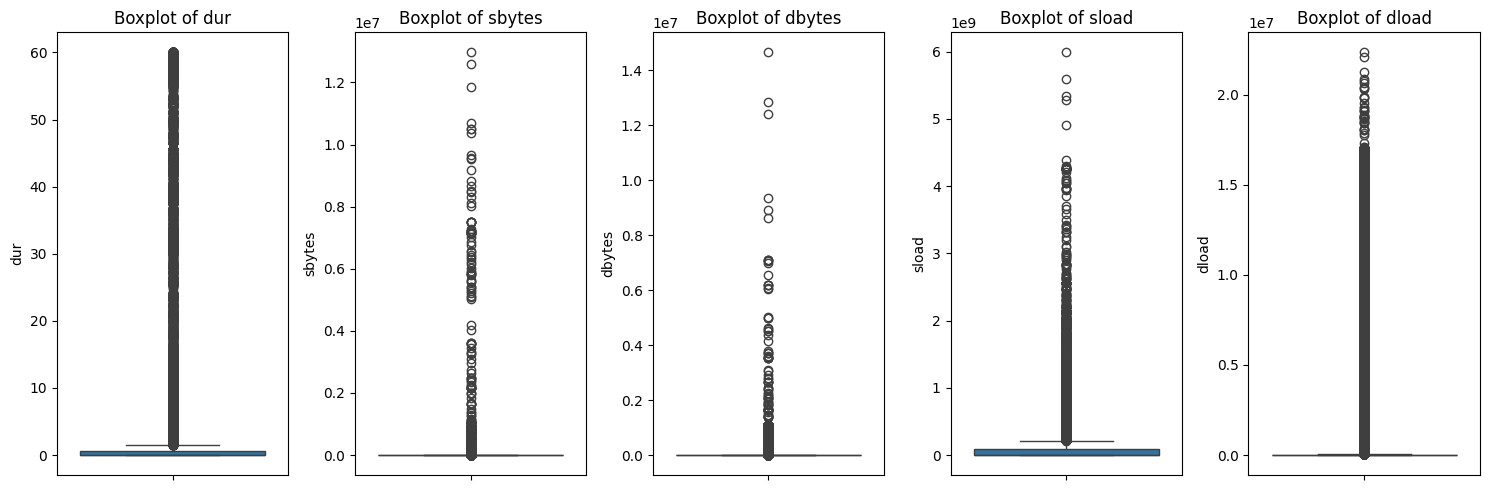


Handling outliers using clip method...

Cleaned Data Statistics:
                 dur         sbytes         dbytes           sttl  \
count  140272.000000  140272.000000  140272.000000  140272.000000   
mean        0.346719     906.780355     573.666170     183.288960   
std         0.535396    1026.533553     807.414274     101.632484   
min         0.000000      28.000000       0.000000       0.000000   
25%         0.000008     114.000000       0.000000      62.000000   
50%         0.001331     450.000000     162.000000     254.000000   
75%         0.625537    1268.000000     836.000000     254.000000   
max         1.563830    2999.000000    2090.000000     255.000000   

                dttl          sloss          dloss         sload  \
count  140272.000000  140272.000000  140272.000000  1.402720e+05   
mean       77.014180       1.465446       1.324676  4.743018e+07   
std       108.254353       1.928720       1.920667  6.793553e+07   
min         0.000000       0.000000     

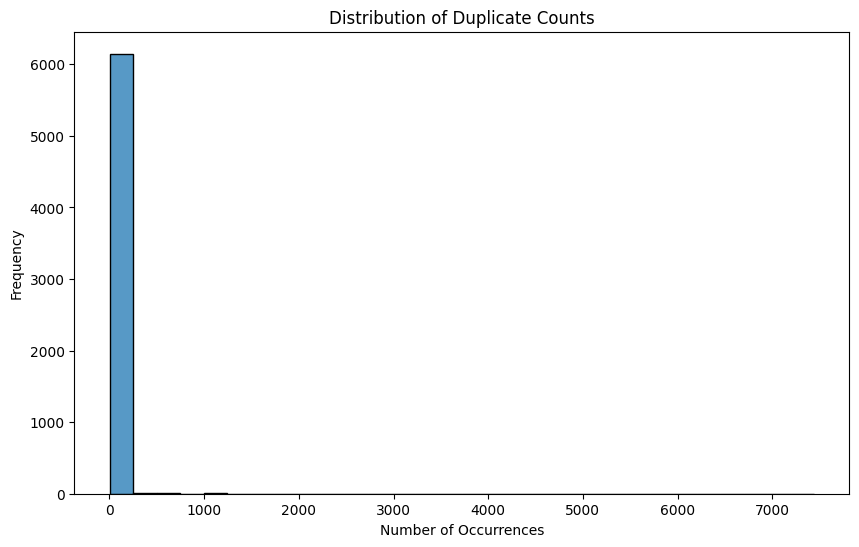


Duplicate Removal Summary:
--------------------------------------------------
Original number of rows: 140272
Rows after removing duplicates: 62327
Number of rows removed: 77945
Percentage of rows removed: 55.57%

Feature Selection Summary:
Original features: 39
Selected features: 28
Features dropped due to low variance: 8
Low variance features: ['is_sm_ips_ports', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'trans_depth', 'response_body_len', 'tcprtt', 'synack', 'ackdat']
Features dropped due to high correlation: 3
Highly correlated features: ['dloss', 'dpkts', 'sinpkt']
Total features dropped: 11
Verification: 39 original - 11 dropped = 28 selected

Creating interaction features...

Creating domain-specific features...

Performing numerical feature binning...

Applying feature selection...

Cleaning is_sm_ips_ports:
Original value distribution:
is_sm_ips_ports
0.0    32817
NaN     1718
1.0      534
Name: count, dtype: int64

New value distribution:
is_sm_ips_ports
0.0    32817
NaN     1718
1.

In [18]:
binary_cleaner_and_imputer = Pipeline([
      ('binary_cleaner', binary_cleaner),
    ('imputer', NetworkTrafficImputer()),
])


cleaner_pipeline = Pipeline([
    ('binary_cleaner_and_imputer', binary_cleaner_and_imputer),
    ('outlier_handler', outlier_handler),
    ('duplicate_handler', duplicate_handler),
    ('feature_engineer', feature_engineer),
])

cleaned_train_set = cleaner_pipeline.fit_transform(train_set)
cleaned_val_set = cleaner_pipeline.transform(val_set)

imputed_test_set = binary_cleaner_and_imputer.transform(test_df)
feature_engineered_test_set = feature_engineer.transform(imputed_test_set)




In [19]:

y_train_set_cleaned = cleaned_train_set['attack_cat']
x_train_set_cleaned = cleaned_train_set.drop(columns=['attack_cat'], axis=1 )

numeric_features = x_train_set_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train_set_cleaned.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', FeatureEncoder(), categorical_features)
    ]
)

# Create pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('normalizer', DataNormalizer(method='l1')), 
    # ('pca', PCAReducer(n_components=20))
])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_set_cleaned)
y_val_encoded = label_encoder.transform(cleaned_val_set['attack_cat'])

# Process data through pipeline
x_train_preprocessed = pipe.fit_transform(x_train_set_cleaned, y_train_encoded)
x_val_preprocessed = pipe.transform(cleaned_val_set)

x_test_preprocessed = pipe.transform(feature_engineered_test_set)

# oversampler
# sampler = SMOTE(sampling_strategy='auto')  
# x_train_preprocessed, y_train_encoded = sampler.fit_resample(x_train_preprocessed, y_train_encoded)
# sampler = RandomUnderSampler(sampling_strategy='auto')
# x_train_preprocessed, y_train_encoded = sampler.fit_resample(x_train_preprocessed, y_train_encoded)


or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [22]:
from knn import OptimizedKNN
from knn import KNeighborsClassifier as Custom_KNN
from datetime import datetime
import os


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

## Scikit Learn KNN

In [131]:
sklearn_knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='uniform')
# x_train_balanced, y_train_balanced
sklearn_knn.fit(x_train_preprocessed, y_train_encoded)

y_pred_sklearn = sklearn_knn.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_sklearn))

print(classification_report(y_val_encoded, y_pred_sklearn))

0.7819979773008203
              precision    recall  f1-score   support

           0       0.46      0.26      0.33       144
           1       0.36      0.13      0.19       111
           2       0.33      0.22      0.27       802
           3       0.73      0.84      0.78      4047
           4       0.65      0.69      0.67      2644
           5       0.93      0.53      0.67       238
           6       0.92      0.89      0.90      8542
           7       0.61      0.71      0.65      1014
           8       0.43      0.20      0.27       229
           9       1.00      0.04      0.07        27

    accuracy                           0.78     17798
   macro avg       0.64      0.45      0.48     17798
weighted avg       0.78      0.78      0.78     17798



## Scratch KNN

In [125]:
knn = OptimizedKNN(
    n_neighbors=9,
    metric="manhattan",
    weights="uniform",
    n_jobs=-1  # Use all CPU cores
)
knn.fit(x_train_preprocessed, y_train_encoded)
ModelPersistence.save_model(knn,f"models/knn{timestamp}")
y_pred_custom = knn.predict(x_val_preprocessed)
print(accuracy_score(y_val_encoded, y_pred_custom))

print(classification_report(y_val_encoded, y_pred_custom))  

0.7811551859759523
              precision    recall  f1-score   support

           0       0.53      0.25      0.34       144
           1       0.48      0.11      0.18       111
           2       0.32      0.17      0.22       802
           3       0.74      0.83      0.78      4047
           4       0.65      0.68      0.66      2644
           5       0.92      0.53      0.68       238
           6       0.91      0.89      0.90      8542
           7       0.58      0.73      0.65      1014
           8       0.41      0.24      0.31       229
           9       1.00      0.04      0.07        27

    accuracy                           0.78     17798
   macro avg       0.65      0.45      0.48     17798
weighted avg       0.77      0.78      0.77     17798



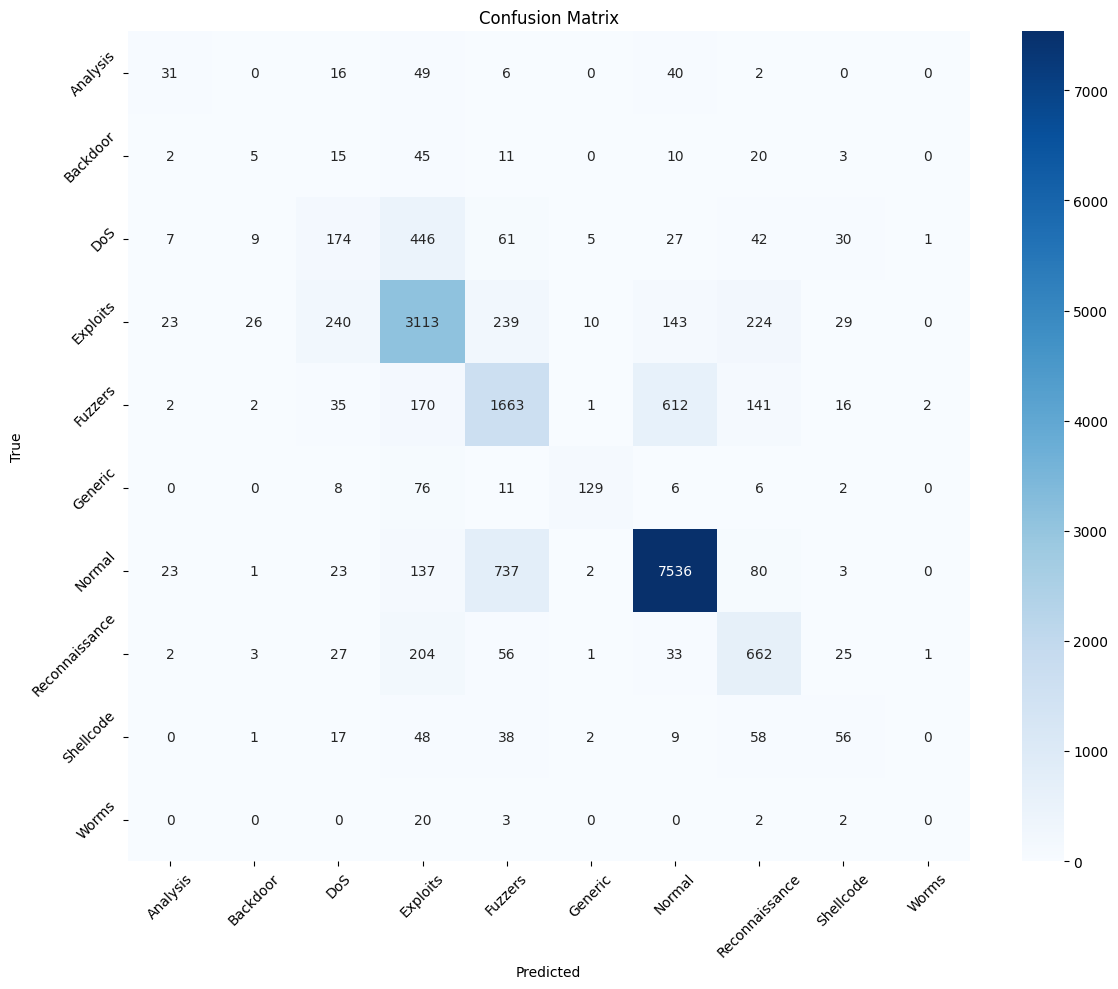

In [123]:


original_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

cm = confusion_matrix(y_val_encoded, y_pred_custom)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=original_labels,
            yticklabels=original_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

F1 Score Comparison
----------------------------------------
Weighted F1: Sklearn=0.7757, Custom=0.7727
Macro F1: Sklearn=0.4800, Custom=0.4783


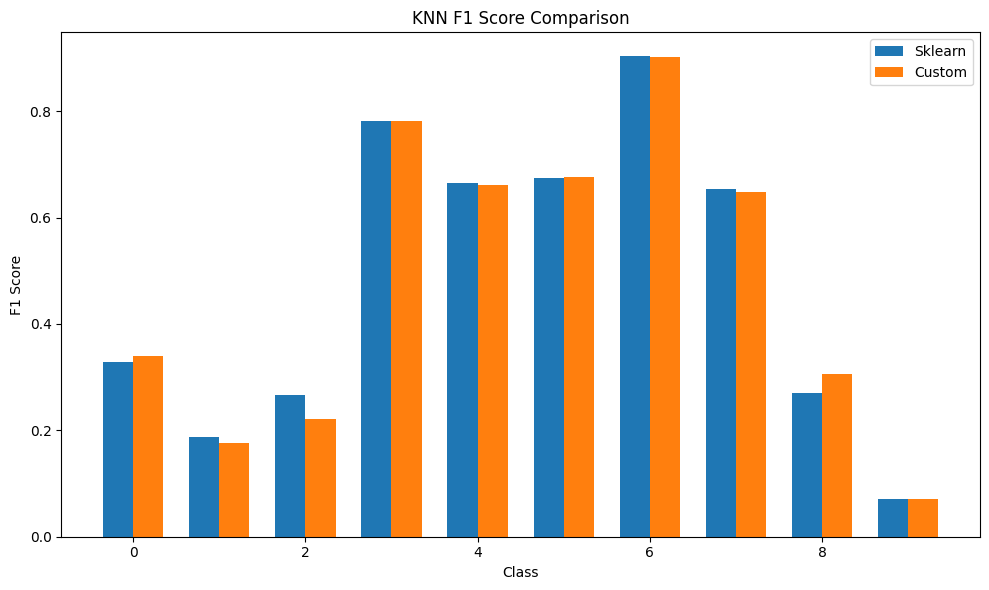

In [136]:

def compare_knn_f1_scores(y_true, y_pred_sklearn, y_pred_custom):
    # Calculate F1 scores
    metrics = {
        'Weighted F1': [
            f1_score(y_true, y_pred_sklearn, average='weighted'),
            f1_score(y_true, y_pred_custom, average='weighted')
        ],
        'Macro F1': [
            f1_score(y_true, y_pred_sklearn, average='macro'),
            f1_score(y_true, y_pred_custom, average='macro')
        ],
        'Per-class F1': [
            f1_score(y_true, y_pred_sklearn, average=None),
            f1_score(y_true, y_pred_custom, average=None)
        ]
    }
    
    # Print comparison
    print("F1 Score Comparison")
    print("-" * 40)
    print(f"Weighted F1: Sklearn={metrics['Weighted F1'][0]:.4f}, Custom={metrics['Weighted F1'][1]:.4f}")
    print(f"Macro F1: Sklearn={metrics['Macro F1'][0]:.4f}, Custom={metrics['Macro F1'][1]:.4f}")
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics['Per-class F1'][0]))
    width = 0.35
    
    plt.bar(x - width/2, metrics['Per-class F1'][0], width, label='Sklearn')
    plt.bar(x + width/2, metrics['Per-class F1'][1], width, label='Custom')
    
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('KNN F1 Score Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage
compare_knn_f1_scores(y_val_encoded, y_pred_sklearn, y_pred_custom)

## B. Naive Bayes

## Scikit Learn Gaussian NB

In [109]:
from sklearn.naive_bayes import GaussianNB

sklearn_gnb = GaussianNB()

sklearn_gnb.fit(x_train_preprocessed,y_train_encoded)

y_pred_sklearn_gnb = sklearn_gnb.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_sklearn_gnb))

print(classification_report(y_val_encoded, y_pred_sklearn_gnb))

0.47280593325092707
              precision    recall  f1-score   support

           0       0.09      0.65      0.15       144
           1       0.03      0.23      0.05       111
           2       1.00      0.00      0.00       802
           3       0.82      0.42      0.55      4047
           4       0.53      0.13      0.21      2644
           5       0.12      0.59      0.20       238
           6       0.99      0.69      0.81      8542
           7       0.06      0.03      0.04      1014
           8       0.05      0.99      0.09       229
           9       0.01      0.15      0.01        27

    accuracy                           0.47     17798
   macro avg       0.37      0.39      0.21     17798
weighted avg       0.79      0.47      0.55     17798



## Scratch Gaussian NB

In [74]:
from naive_bayes import GaussianNB as CustomGaussianNB

custom_gnb = CustomGaussianNB()

custom_gnb.fit(x_train_preprocessed, y_train_encoded)
ModelPersistence.save_model(custom_gnb, f"models/custom_GNB{timestamp}")
y_pred_custom_gnb = custom_gnb.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_custom_gnb))

print(classification_report(y_val_encoded, y_pred_custom_gnb))

0.47280593325092707
              precision    recall  f1-score   support

           0       0.09      0.65      0.15       144
           1       0.03      0.23      0.05       111
           2       1.00      0.00      0.00       802
           3       0.82      0.42      0.55      4047
           4       0.53      0.13      0.21      2644
           5       0.12      0.59      0.20       238
           6       0.99      0.69      0.81      8542
           7       0.06      0.03      0.04      1014
           8       0.05      0.99      0.09       229
           9       0.01      0.15      0.01        27

    accuracy                           0.47     17798
   macro avg       0.37      0.39      0.21     17798
weighted avg       0.79      0.47      0.55     17798



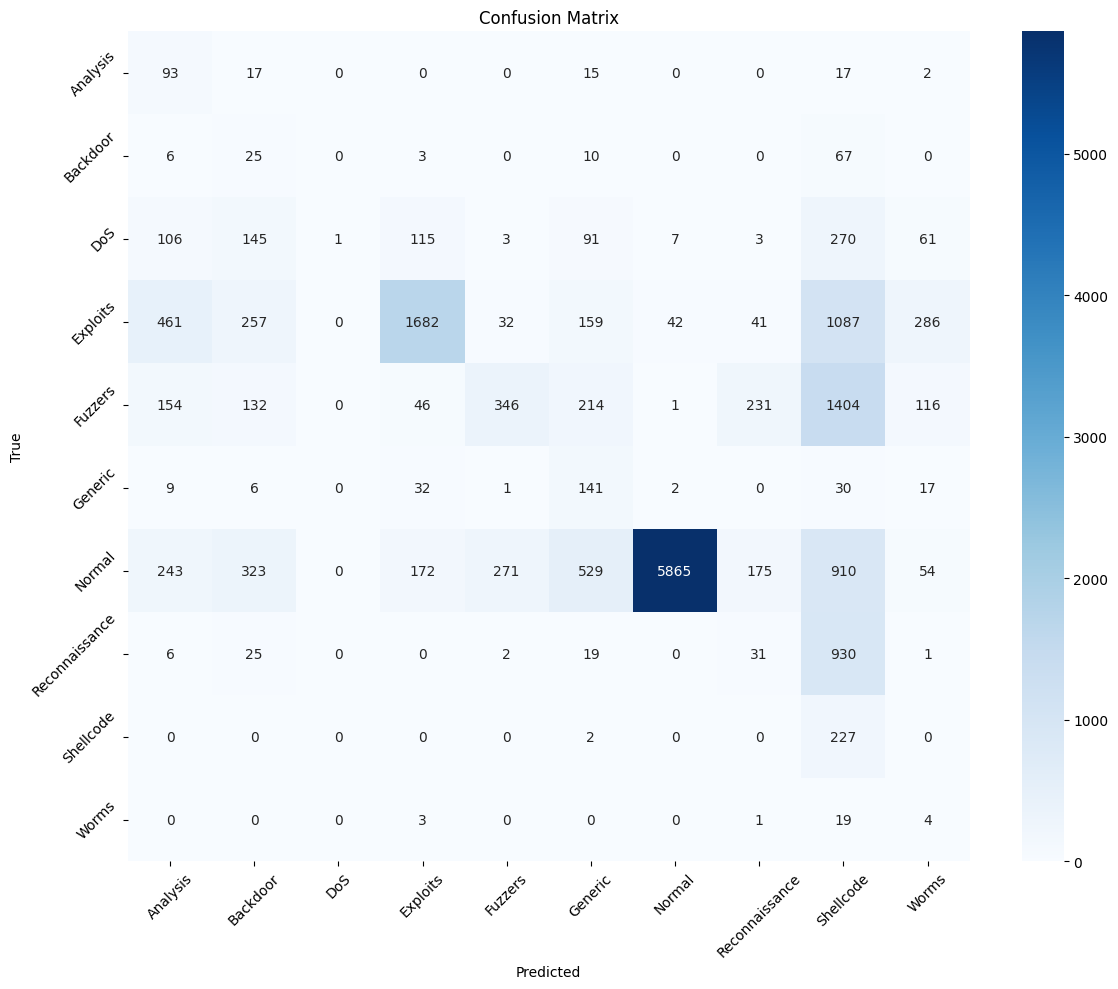

In [122]:

original_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))


cm = confusion_matrix(y_val_encoded, y_pred_custom_gnb)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=original_labels,
            yticklabels=original_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Naive Bayes F1 Score Comparison
----------------------------------------
Weighted F1: Sklearn=0.5537, Custom=0.5537
Macro F1: Sklearn=0.2117, Custom=0.2117


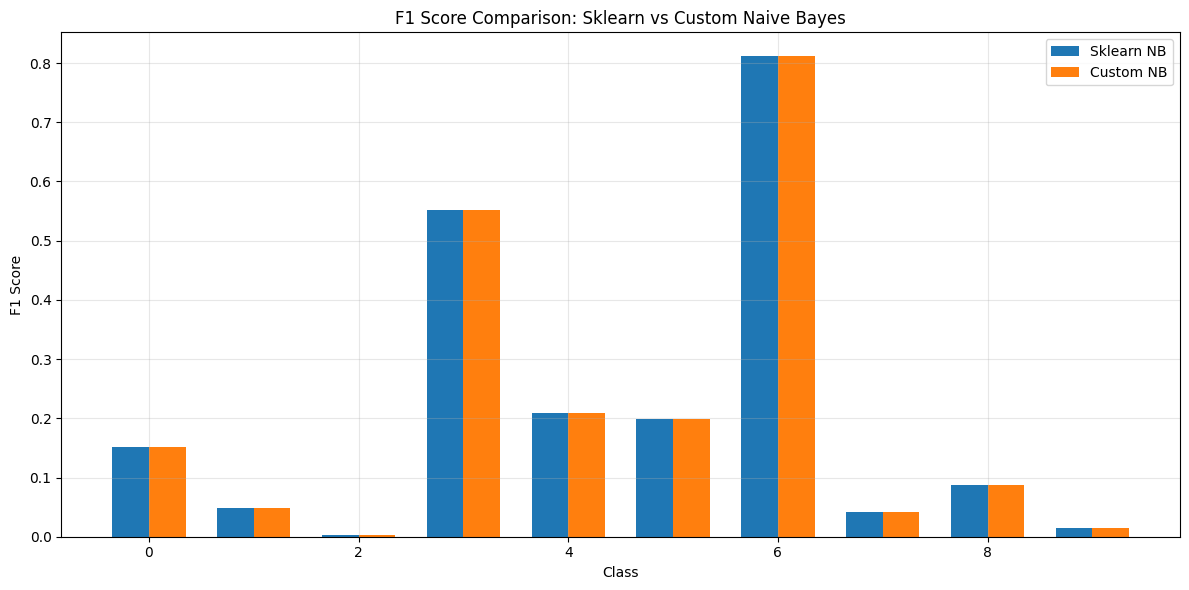

In [144]:

def compare_naive_bayes_f1(y_true, y_pred_sklearn, y_pred_custom):

    sklearn_f1 = {
        'weighted': f1_score(y_true, y_pred_sklearn, average='weighted'),
        'macro': f1_score(y_true, y_pred_sklearn, average='macro'),
        'per_class': f1_score(y_true, y_pred_sklearn, average=None)
    }
    
    custom_f1 = {
        'weighted': f1_score(y_true, y_pred_custom, average='weighted'),
        'macro': f1_score(y_true, y_pred_custom, average='macro'),
        'per_class': f1_score(y_true, y_pred_custom, average=None)
    }
    

    print("Naive Bayes F1 Score Comparison")
    print("-" * 40)
    print(f"Weighted F1: Sklearn={sklearn_f1['weighted']:.4f}, Custom={custom_f1['weighted']:.4f}")
    print(f"Macro F1: Sklearn={sklearn_f1['macro']:.4f}, Custom={custom_f1['macro']:.4f}")
    
 
    plt.figure(figsize=(12, 6))
    x = np.arange(len(sklearn_f1['per_class']))
    width = 0.35
    
    plt.bar(x - width/2, sklearn_f1['per_class'], width, label='Sklearn NB')
    plt.bar(x + width/2, custom_f1['per_class'], width, label='Custom NB')
    

    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison: Sklearn vs Custom Naive Bayes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

compare_naive_bayes_f1(
    y_val_encoded, 
    y_pred_sklearn_gnb, 
    y_pred_custom_gnb,

)

## C. ID3

In [21]:
from id3 import ID3DecisionTree as Custom_ID3

## Scratch ID3

In [23]:
custom_id3 = Custom_ID3(max_depth=14, min_samples_split=5)

custom_id3.fit(x_train_preprocessed, y_train_encoded)
ModelPersistence.save_model(custom_id3, f"models/custom_id3{timestamp}")
y_pred_custom_dtl = custom_id3.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_custom_dtl))

print(classification_report(y_val_encoded, y_pred_custom_dtl))

0.7949769637037869
              precision    recall  f1-score   support

           0       0.46      0.22      0.29       144
           1       0.51      0.23      0.31       111
           2       0.37      0.25      0.30       802
           3       0.77      0.82      0.79      4047
           4       0.62      0.81      0.70      2644
           5       0.74      0.69      0.71       238
           6       0.93      0.86      0.90      8542
           7       0.77      0.76      0.77      1014
           8       0.56      0.53      0.55       229
           9       0.36      0.33      0.35        27

    accuracy                           0.79     17798
   macro avg       0.61      0.55      0.57     17798
weighted avg       0.80      0.79      0.79     17798



In [146]:
y_pred_custom_dtl = custom_id3.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_custom_dtl))

print(classification_report(y_val_encoded, y_pred_custom_dtl))

0.7949769637037869
              precision    recall  f1-score   support

           0       0.46      0.22      0.29       144
           1       0.51      0.23      0.31       111
           2       0.37      0.25      0.30       802
           3       0.77      0.82      0.79      4047
           4       0.62      0.81      0.70      2644
           5       0.74      0.69      0.71       238
           6       0.93      0.86      0.90      8542
           7       0.77      0.76      0.77      1014
           8       0.56      0.53      0.55       229
           9       0.36      0.33      0.35        27

    accuracy                           0.79     17798
   macro avg       0.61      0.55      0.57     17798
weighted avg       0.80      0.79      0.79     17798



## Scikit Learn ID3

In [147]:
from sklearn.tree import DecisionTreeClassifier

sklearn_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=5)


sklearn_id3.fit(x_train_preprocessed, y_train_encoded)

y_pred_sklearn_dtl = sklearn_id3.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_sklearn_dtl))

print(classification_report(y_val_encoded, y_pred_sklearn_dtl))

0.7953702663220586
              precision    recall  f1-score   support

           0       0.47      0.21      0.29       144
           1       0.50      0.26      0.34       111
           2       0.38      0.26      0.31       802
           3       0.76      0.83      0.80      4047
           4       0.62      0.79      0.70      2644
           5       0.79      0.67      0.73       238
           6       0.93      0.86      0.90      8542
           7       0.79      0.77      0.78      1014
           8       0.53      0.47      0.50       229
           9       0.40      0.44      0.42        27

    accuracy                           0.80     17798
   macro avg       0.62      0.56      0.58     17798
weighted avg       0.80      0.80      0.79     17798



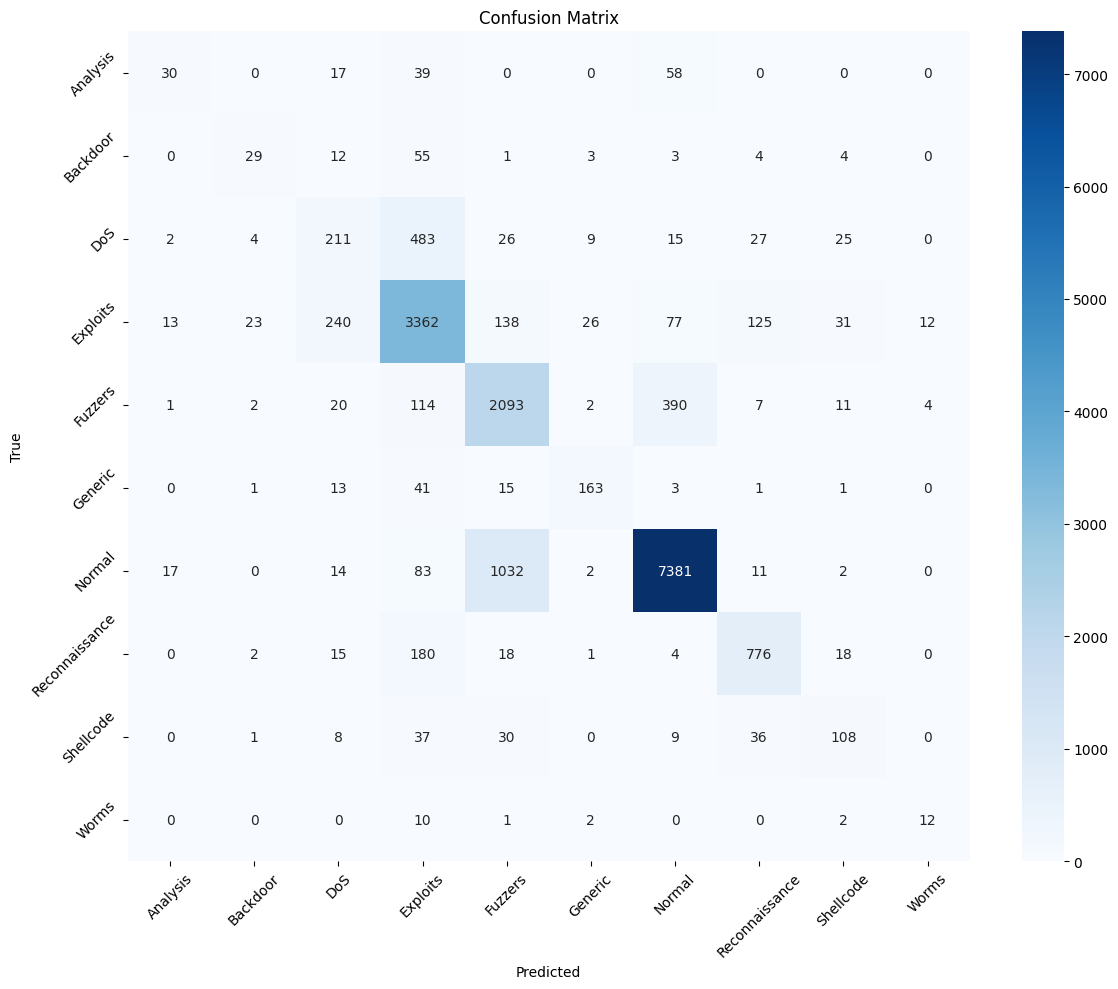

In [143]:
original_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))


cm = confusion_matrix(y_val_encoded, y_pred_custom_dtl)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=original_labels,
            yticklabels=original_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

ID3 Implementation Comparison
----------------------------------------
Accuracy: Sklearn=0.7954, Custom=0.7950
F1 Weighted: Sklearn=0.7934, Custom=0.7930
F1 Macro: Sklearn=0.5752, Custom=0.5669


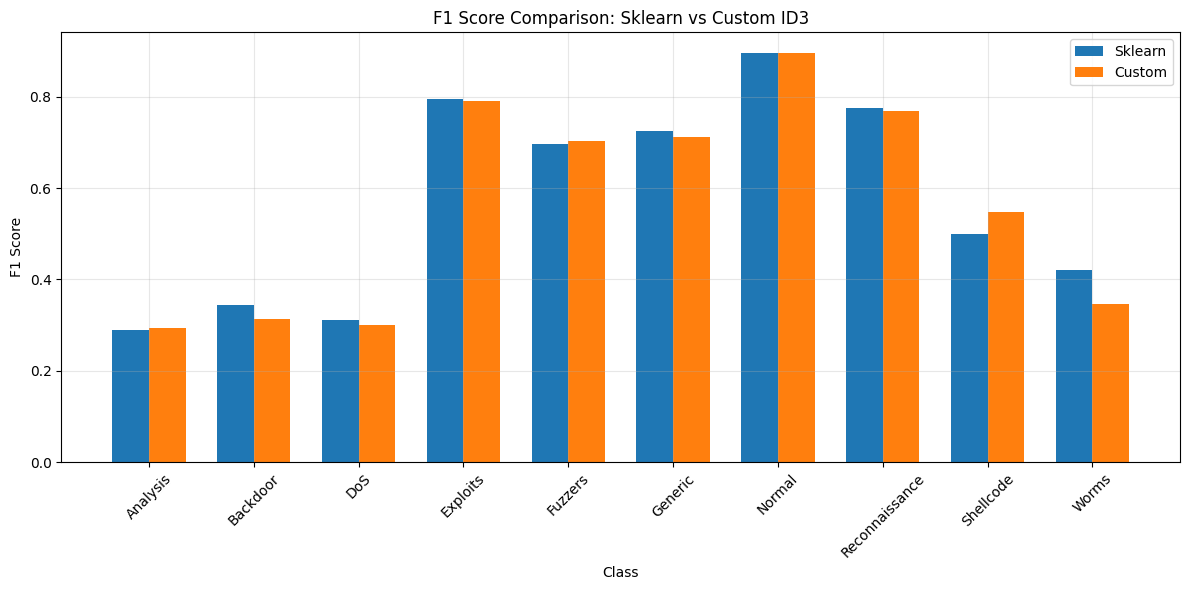

In [149]:
def compare_id3_implementations(y_true, y_pred_sklearn, y_pred_custom, class_names=None):
 
    metrics = {
        'Accuracy': {
            'Sklearn': accuracy_score(y_true, y_pred_sklearn),
            'Custom': accuracy_score(y_true, y_pred_custom)
        },
        'F1 Weighted': {
            'Sklearn': f1_score(y_true, y_pred_sklearn, average='weighted'),
            'Custom': f1_score(y_true, y_pred_custom, average='weighted')
        },
        'F1 Macro': {
            'Sklearn': f1_score(y_true, y_pred_sklearn, average='macro'),
            'Custom': f1_score(y_true, y_pred_custom, average='macro')
        },
        'Per-class F1': {
            'Sklearn': f1_score(y_true, y_pred_sklearn, average=None),
            'Custom': f1_score(y_true, y_pred_custom, average=None)
        }
    }
    

    print("ID3 Implementation Comparison")
    print("-" * 40)
    print(f"Accuracy: Sklearn={metrics['Accuracy']['Sklearn']:.4f}, Custom={metrics['Accuracy']['Custom']:.4f}")
    print(f"F1 Weighted: Sklearn={metrics['F1 Weighted']['Sklearn']:.4f}, Custom={metrics['F1 Weighted']['Custom']:.4f}")
    print(f"F1 Macro: Sklearn={metrics['F1 Macro']['Sklearn']:.4f}, Custom={metrics['F1 Macro']['Custom']:.4f}")
    
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics['Per-class F1']['Sklearn']))
    width = 0.35
    
    plt.bar(x - width/2, metrics['Per-class F1']['Sklearn'], width, label='Sklearn')
    plt.bar(x + width/2, metrics['Per-class F1']['Custom'], width, label='Custom')
    
    if class_names is not None:
        plt.xticks(x, class_names, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison: Sklearn vs Custom ID3')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return metrics

# Usage
metrics = compare_id3_implementations(
    y_val_encoded,
    y_pred_sklearn_dtl,
    y_pred_custom_dtl, 
    class_names=label_encoder.classes_
)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [114]:


max_depth = 1
best_f2 = 0
best_depth = 1
patience = 5 
counter = 0

print("Starting depth tuning...")
print("Depth\tF2-Score\tF1-Score")
print("-" * 40)

while True:
    
    dt = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=max_depth,
        random_state=42
    )
    
    dt.fit(x_train_preprocessed, y_train_encoded)
    
  
    y_pred = dt.predict(x_val_preprocessed)
 
    f2 = fbeta_score(y_val_encoded, y_pred, beta=2, average='weighted')
    f1 = f1_score(y_val_encoded, y_pred, average='weighted')
    
   
    print(f"{max_depth}\t{f2:.4f}\t{f1:.4f}")
    
    # check 
    if f2 > best_f2:
        best_f2 = f2
        best_depth = max_depth
        counter = 0
    else:
        counter += 1
    
    # stop if no improvement for patience' iterations
    if counter >= patience:
        break
        
    max_depth += 1

# train final model with best depth
final_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=best_depth,
    random_state=42
)

final_dt.fit(x_train_preprocessed, y_train_encoded)

# Final evaluation
y_pred_final = final_dt.predict(x_val_preprocessed)
final_f2 = fbeta_score(y_val_encoded, y_pred_final, beta=2, average='weighted')
final_f1 = f1_score(y_val_encoded, y_pred_final, average='weighted')

print("\nTuning Complete!")
print("-" * 40)
print(f"Best max_depth: {best_depth}")
print(f"Best F2-Score: {final_f2:.4f}")
print(f"F1-Score at best F2: {final_f1:.4f}")
print("\nFull Classification Report:")
print(classification_report(y_val_encoded, y_pred_final))

Starting depth tuning...
Depth	F2-Score	F1-Score
----------------------------------------
1	0.5313	0.5188
2	0.6283	0.6276
3	0.6473	0.6362
4	0.6877	0.6881
5	0.6980	0.6965
6	0.7280	0.7166
7	0.7495	0.7461
8	0.7592	0.7590
9	0.7706	0.7705
10	0.7829	0.7791
11	0.7908	0.7906
12	0.7914	0.7912
13	0.7944	0.7940
14	0.7945	0.7942
15	0.7911	0.7894
16	0.7904	0.7909
17	0.7866	0.7864
18	0.7875	0.7874
19	0.7860	0.7855

Tuning Complete!
----------------------------------------
Best max_depth: 14
Best F2-Score: 0.7945
F1-Score at best F2: 0.7942

Full Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       144
           1       0.49      0.25      0.33       111
           2       0.37      0.25      0.30       802
           3       0.76      0.82      0.79      4047
           4       0.63      0.81      0.71      2644
           5       0.72      0.68      0.70       238
           6       0.93      0.87      0.90      8542
      

In [124]:
from sklearn.metrics import fbeta_score, f1_score, classification_report
import itertools

def tune_knn_parameters(X_train, y_train, X_val, y_val, patience=5):
    # Parameter ranges
    n_neighbors_range = range(1, 21, 2)  # 1,3,5,...,19
    metrics = ['euclidean', 'manhattan', 'minkowski']
    p_values = [1, 2, 3]  # For minkowski
    
    best_f2 = 0
    best_params = None
    counter = 0
    
    print("Starting KNN parameter tuning...")
    print("n_neighbors\tmetric\t\tp\tF2-Score\tF1-Score")
    print("-" * 60)
    
    # Generate parameter combinations
    param_combinations = []
    for n in n_neighbors_range:
        for m in metrics:
            if m == 'minkowski':
                for p in p_values:
                    param_combinations.append((n, m, p))
            else:
                param_combinations.append((n, m, None))
    
    for n_neighbors, metric, p in param_combinations:
        # Create and train KNN
        knn = KNeighborsClassifier(
            n_neighbors=n_neighbors,
            metric=metric,
            p=p
        )
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        
        # Calculate scores
        f2 = fbeta_score(y_val, y_pred, beta=2, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        print(f"{n_neighbors}\t\t{metric}\t\t{p if p else '-'}\t{f2:.4f}\t{f1:.4f}")
        
        # Check if better
        if f2 > best_f2:
            best_f2 = f2
            best_params = (n_neighbors, metric, p)
            counter = 0
        else:
            counter += 1
        
        # Early stopping
        if counter >= patience:
            break
    
    # Train final model with best parameters
    final_knn = KNeighborsClassifier(
        n_neighbors=best_params[0],
        metric=best_params[1],
        p=best_params[2]
    )
    
    final_knn.fit(X_train, y_train)
    y_pred_final = final_knn.predict(X_val)
    
    print("\nTuning Complete!")
    print("-" * 60)
    print(f"Best parameters: n_neighbors={best_params[0]}, metric={best_params[1]}, p={best_params[2]}")
    print(f"Best F2-Score: {best_f2:.4f}")
    print("\nFull Classification Report:")
    print(classification_report(y_val, y_pred_final))
    
    return final_knn, best_params

# Usage
best_knn, best_params = tune_knn_parameters(
    x_train_preprocessed, 
    y_train_encoded,
    x_val_preprocessed, 
    y_val_encoded
)

Starting KNN parameter tuning...
n_neighbors	metric		p	F2-Score	F1-Score
------------------------------------------------------------
1		euclidean		-	0.7265	0.7266
1		manhattan		-	0.7488	0.7483
1		minkowski		1	0.7488	0.7483
1		minkowski		2	0.7265	0.7266
1		minkowski		3	0.7164	0.7165
3		euclidean		-	0.7391	0.7408
3		manhattan		-	0.7623	0.7634
3		minkowski		1	0.7623	0.7634
3		minkowski		2	0.7391	0.7408
3		minkowski		3	0.7243	0.7265
5		euclidean		-	0.7487	0.7480
5		manhattan		-	0.7733	0.7719
5		minkowski		1	0.7733	0.7719
5		minkowski		2	0.7487	0.7480
5		minkowski		3	0.7361	0.7352
7		euclidean		-	0.7530	0.7512
7		manhattan		-	0.7760	0.7735
7		minkowski		1	0.7760	0.7735
7		minkowski		2	0.7530	0.7512
7		minkowski		3	0.7418	0.7400
9		euclidean		-	0.7545	0.7521
9		manhattan		-	0.7788	0.7757
9		minkowski		1	0.7788	0.7757
9		minkowski		2	0.7545	0.7521
9		minkowski		3	0.7407	0.7387
11		euclidean		-	0.7550	0.7522
11		manhattan		-	0.7737	0.7701

Tuning Complete!
------------------------------------

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [126]:

y_test_pred = knn.predict(x_test_preprocessed)

test_df['attack_cat'] = y_test_pred
test_df['attack_cat'] = label_encoder.inverse_transform(test_df['attack_cat'])
test_df[['id', 'attack_cat']].to_csv('submission.csv', index=False)


In [119]:
original_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Create mapping dictionary
label_mapping = dict(enumerate(original_labels))

print("Label Mapping:")
for num_label, orig_label in label_mapping.items():
    print(f"{num_label}: {orig_label}")

Label Mapping:
0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`

1.	**Why ID3 in our case better than the rest of the model?**<br> 
In our case ID3 is better than both KNN and Naive Bayes because ID3 uses Information Gain to split features, which ensures that each decision node minimizes entropy to get the best attribute for splitting.
ID3 can overfit if the tree depth is not controlled, but in our case here we tune the parameter max_depth and min_samples_split so overfit doesn’t happen and we can get the best general result.
KNN and Naive Bayes are sensitive to noise and outlier which this dataset has many noise and outlier hence ID3 will perform better in this case.

2.	**Why all of the models predict Normal better?** <br>
This is due to class imbalance in the dataset, in the dataset “Normal” instances has higher proportion compared to other classes. Models tend to favor the majority class because it minimizes the overall error.
3.	**Is it better to impute or drop missing value?** <br>
In this case, the data contain many missing value, the original data is 170k rows and if we drop all missing value the data become only 20k rows. In this case imputation is better because if we drop all rows that contain missing values, we will lose a lot of data. We choose to impute numerical value by median and categorical by mode.


4. **Does removing duplicate can improve result model?** <br>
Our techinique on removing duplicates are : first, we choose subset of columns, and then for all row that has same value of the chosen subset, we consider that as duplicate and then we choose to discard all the other row except the first. We choose to discard those duplicate because it is considered as packet retransmission


In [31]:
data = ModelPersistence.load_model("models/custom_id320241215_234528")

model = data['model']
print(data)

y_pred = model.predict(x_val_preprocessed)

print(classification_report(y_val_encoded, y_pred))




{'model': <id3.ID3DecisionTree object at 0x0000025149A67A70>, 'params': None, 'type': 'ID3DecisionTree', 'timestamp': datetime.datetime(2024, 12, 15, 23, 53, 50, 425867), 'metadata': None}
              precision    recall  f1-score   support

           0       0.46      0.22      0.29       144
           1       0.51      0.23      0.31       111
           2       0.37      0.25      0.30       802
           3       0.77      0.82      0.79      4047
           4       0.62      0.81      0.70      2644
           5       0.74      0.69      0.71       238
           6       0.93      0.86      0.90      8542
           7       0.77      0.76      0.77      1014
           8       0.56      0.53      0.55       229
           9       0.36      0.33      0.35        27

    accuracy                           0.79     17798
   macro avg       0.61      0.55      0.57     17798
weighted avg       0.80      0.79      0.79     17798

